<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [58]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [59]:
sat_data = './sat_scores.csv'

sat_list = []

with open(sat_data, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        sat_list.append(row)

sat_dict = {key: [row[i] for row in sat_list[1:]] for i, key in enumerate(sat_list[0])}

sat_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [60]:
#Create Pandas DataFrame object from SAT Dictionary.
sat_dict_df = pd.DataFrame(sat_dict)

#Dtypes attribute
sat_dict_df.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [61]:
#Create Pandas DataFrame object from SAT CSV File.
sat_df = pd.read_csv(sat_data)

#Dtypes attribute
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

<font color='blue'>
    
#### Answer:

The values under the 'Rate', 'Verbal', and 'Math' columns were imported as Object datatypes when the dataframe was created from a dictionary. Values are integers when csv file was imported using .read_csv. 
</font>

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [62]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [63]:
sat_df_dict = {'State':{'Type':'Object', 'Description':'List of States'}, 
               'Rate':{'Type':'Integer', 'Description':'Passing rate of students'},
               'Verbal':{'Type':'Integer', 'Description':'Average score for Verbal test'},
               'Math':{'Type':'Integer', 'Description':'Average score for Mathematics test'},
               'Dataset Shape':sat_df.shape}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

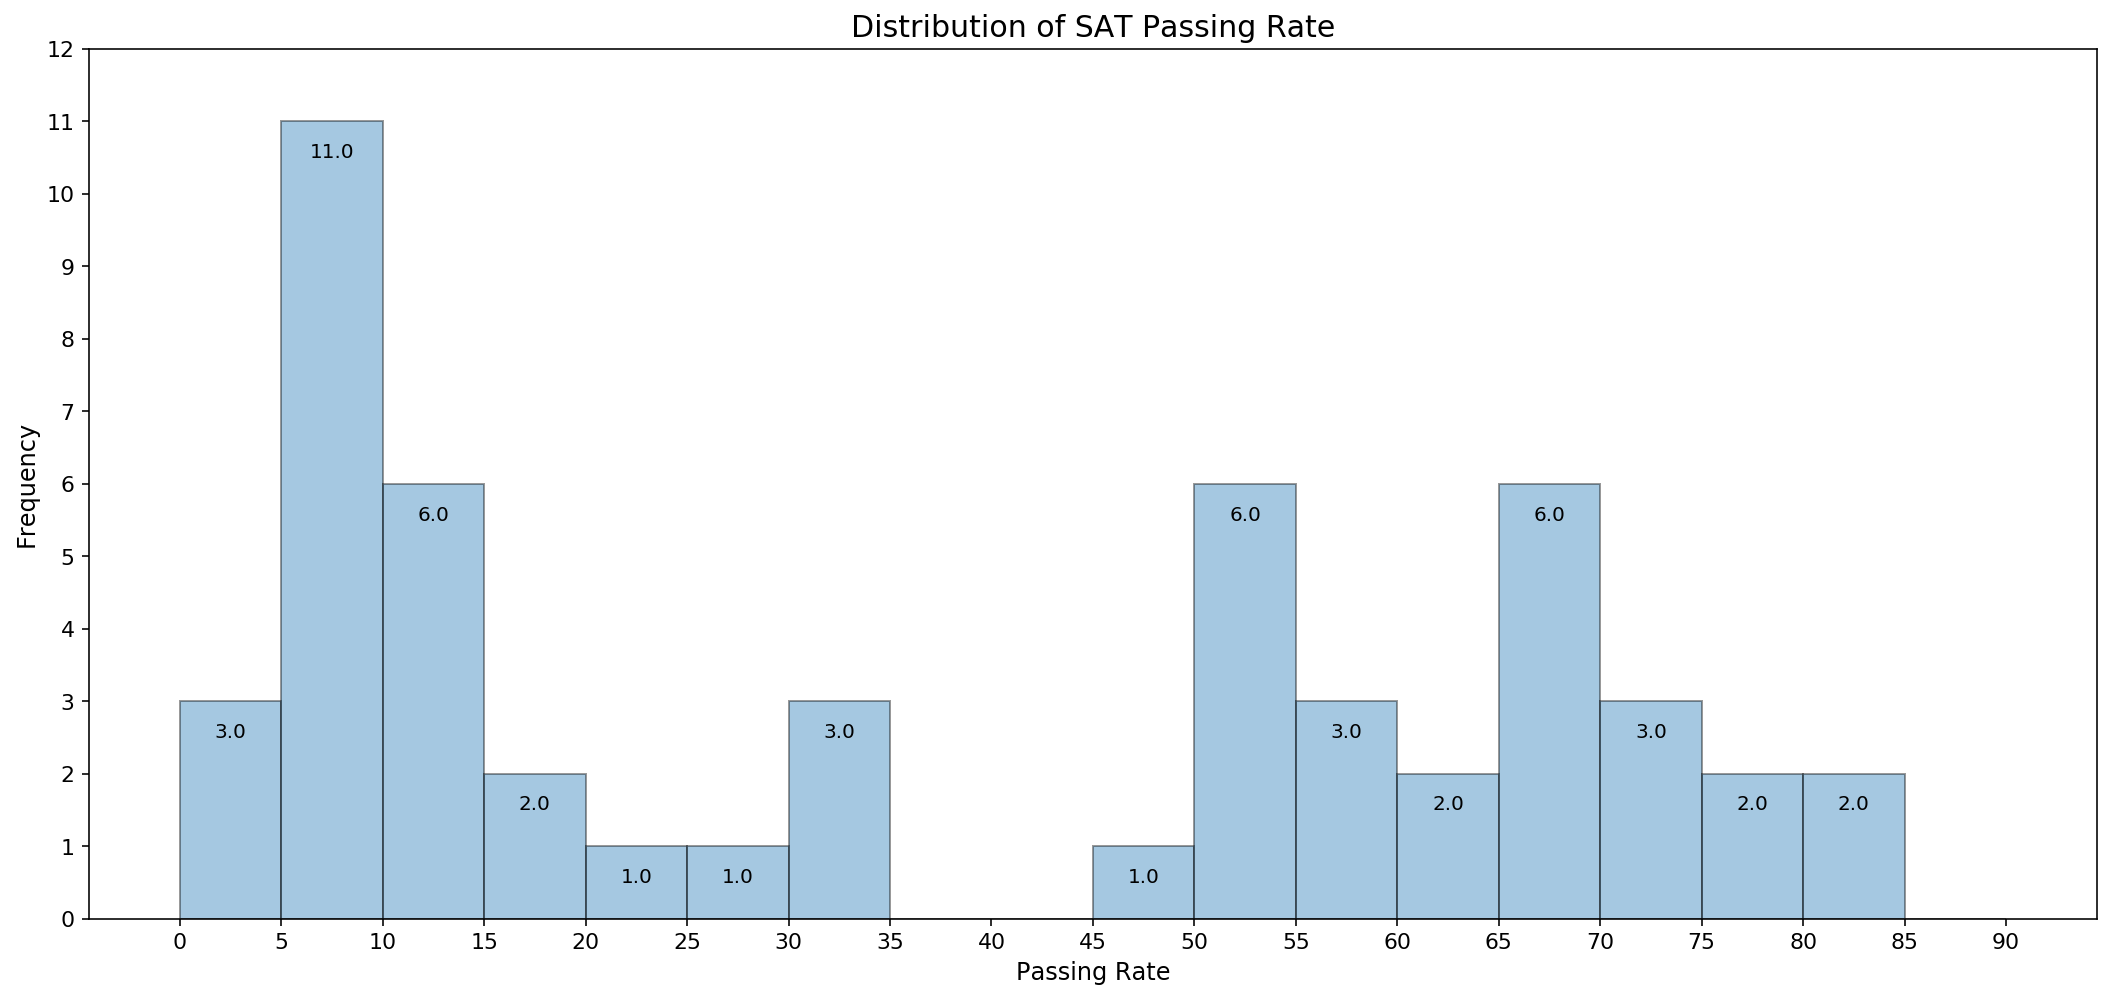

In [65]:
#Distplot of Rate

fig, ax = plt.subplots(figsize=(18,8))

ax = sns.distplot(sat_df['Rate'], bins=np.arange(0, sat_df['Rate'].max()+10, 5), 
                  hist_kws=dict(edgecolor="k", linewidth=1), kde=False, ax=ax)

#Set the x and y ticks paramenters
ax.set_xticks(np.arange(0, sat_df['Rate'].max()+10, 5))

heights = [i.get_height() for i in ax.patches]  #get the y axis values for the bars
ax.set_yticks(np.arange(0, np.max(heights)+2, 1))
ax.tick_params(axis='both', labelsize=11)

#Set the x-y label parameters
ax.set_xlabel('Passing Rate', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

#Set the plot title
ax.set_title('Distribution of SAT Passing Rate', fontsize=15)

#Annotate bar values
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()-0.5), ha='center', fontsize=10)

plt.show()


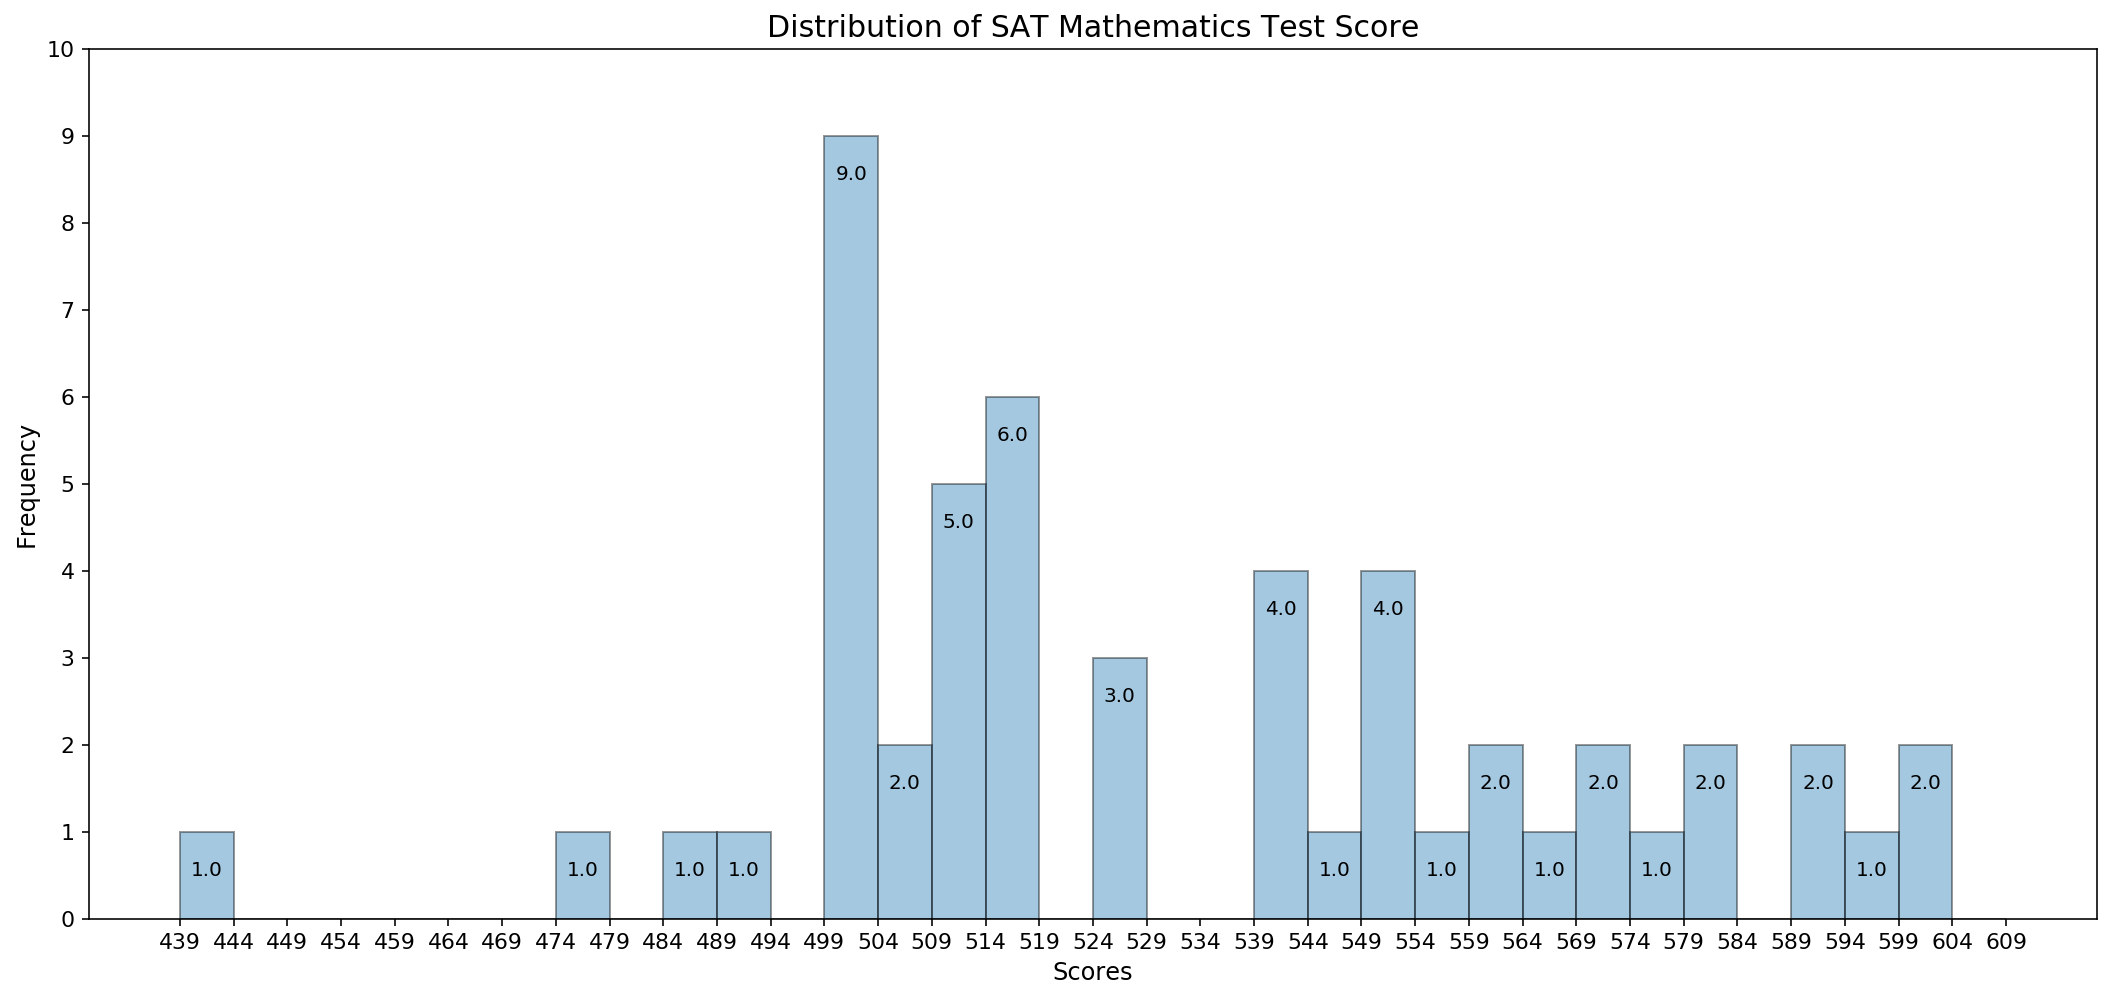

In [66]:
#Distplot of Math Scores

fig, ax = plt.subplots(figsize=(18,8))

ax = sns.distplot(sat_df['Math'], bins=np.arange(sat_df['Math'].min(), sat_df['Math'].max()+10, 5), 
                  hist_kws=dict(edgecolor="k", linewidth=1), kde=False, ax=ax)

#Set the x and y ticks paramenters
ax.set_xticks(np.arange(sat_df['Math'].min(), sat_df['Math'].max()+10, 5))

heights = [i.get_height() for i in ax.patches]  #get the y axis values for the bars
ax.set_yticks(np.arange(0, np.max(heights)+2, 1))
ax.tick_params(axis='both', labelsize=11)

#Set the x-y label parameters
ax.set_xlabel('Scores', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

#Set the plot title
ax.set_title('Distribution of SAT Mathematics Test Score', fontsize=15)

#Annotate bar values
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()-0.5), ha='center', fontsize=10)

plt.show()

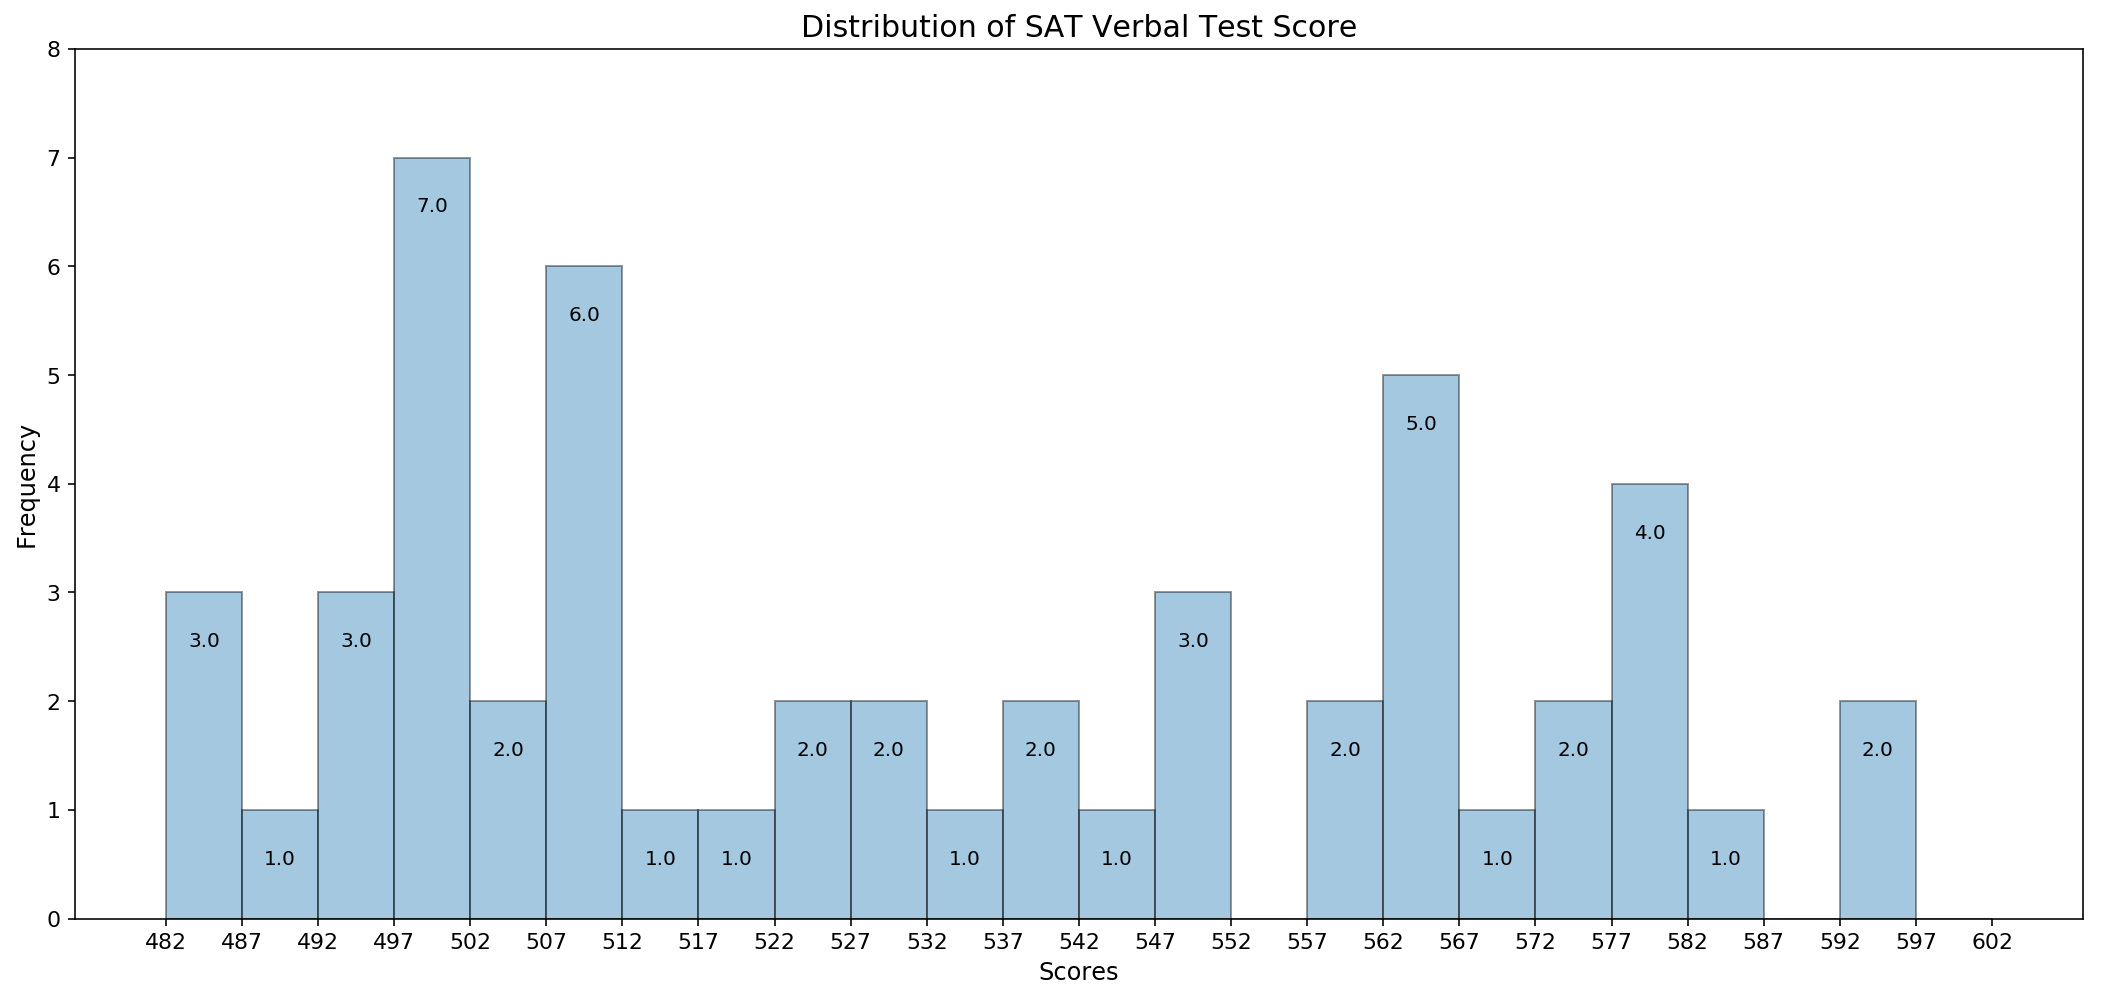

In [67]:
#Distplot of Verbal Scores

fig, ax = plt.subplots(figsize=(18,8))

ax = sns.distplot(sat_df['Verbal'], bins=np.arange(sat_df['Verbal'].min(), sat_df['Verbal'].max()+10, 5), 
                  hist_kws=dict(edgecolor="k", linewidth=1), kde=False, ax=ax)

#Set the x and y ticks paramenters
ax.set_xticks(np.arange(sat_df['Verbal'].min(), sat_df['Verbal'].max()+10, 5))

heights = [i.get_height() for i in ax.patches]  #get the y axis values for the bars
ax.set_yticks(np.arange(0, np.max(heights)+2, 1))
ax.tick_params(axis='both', labelsize=11)

#Set the x-y label parameters
ax.set_xlabel('Scores', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

#Set the plot title
ax.set_title('Distribution of SAT Verbal Test Score', fontsize=15)

#Annotate bar values
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()-0.5), ha='center', fontsize=10)

plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

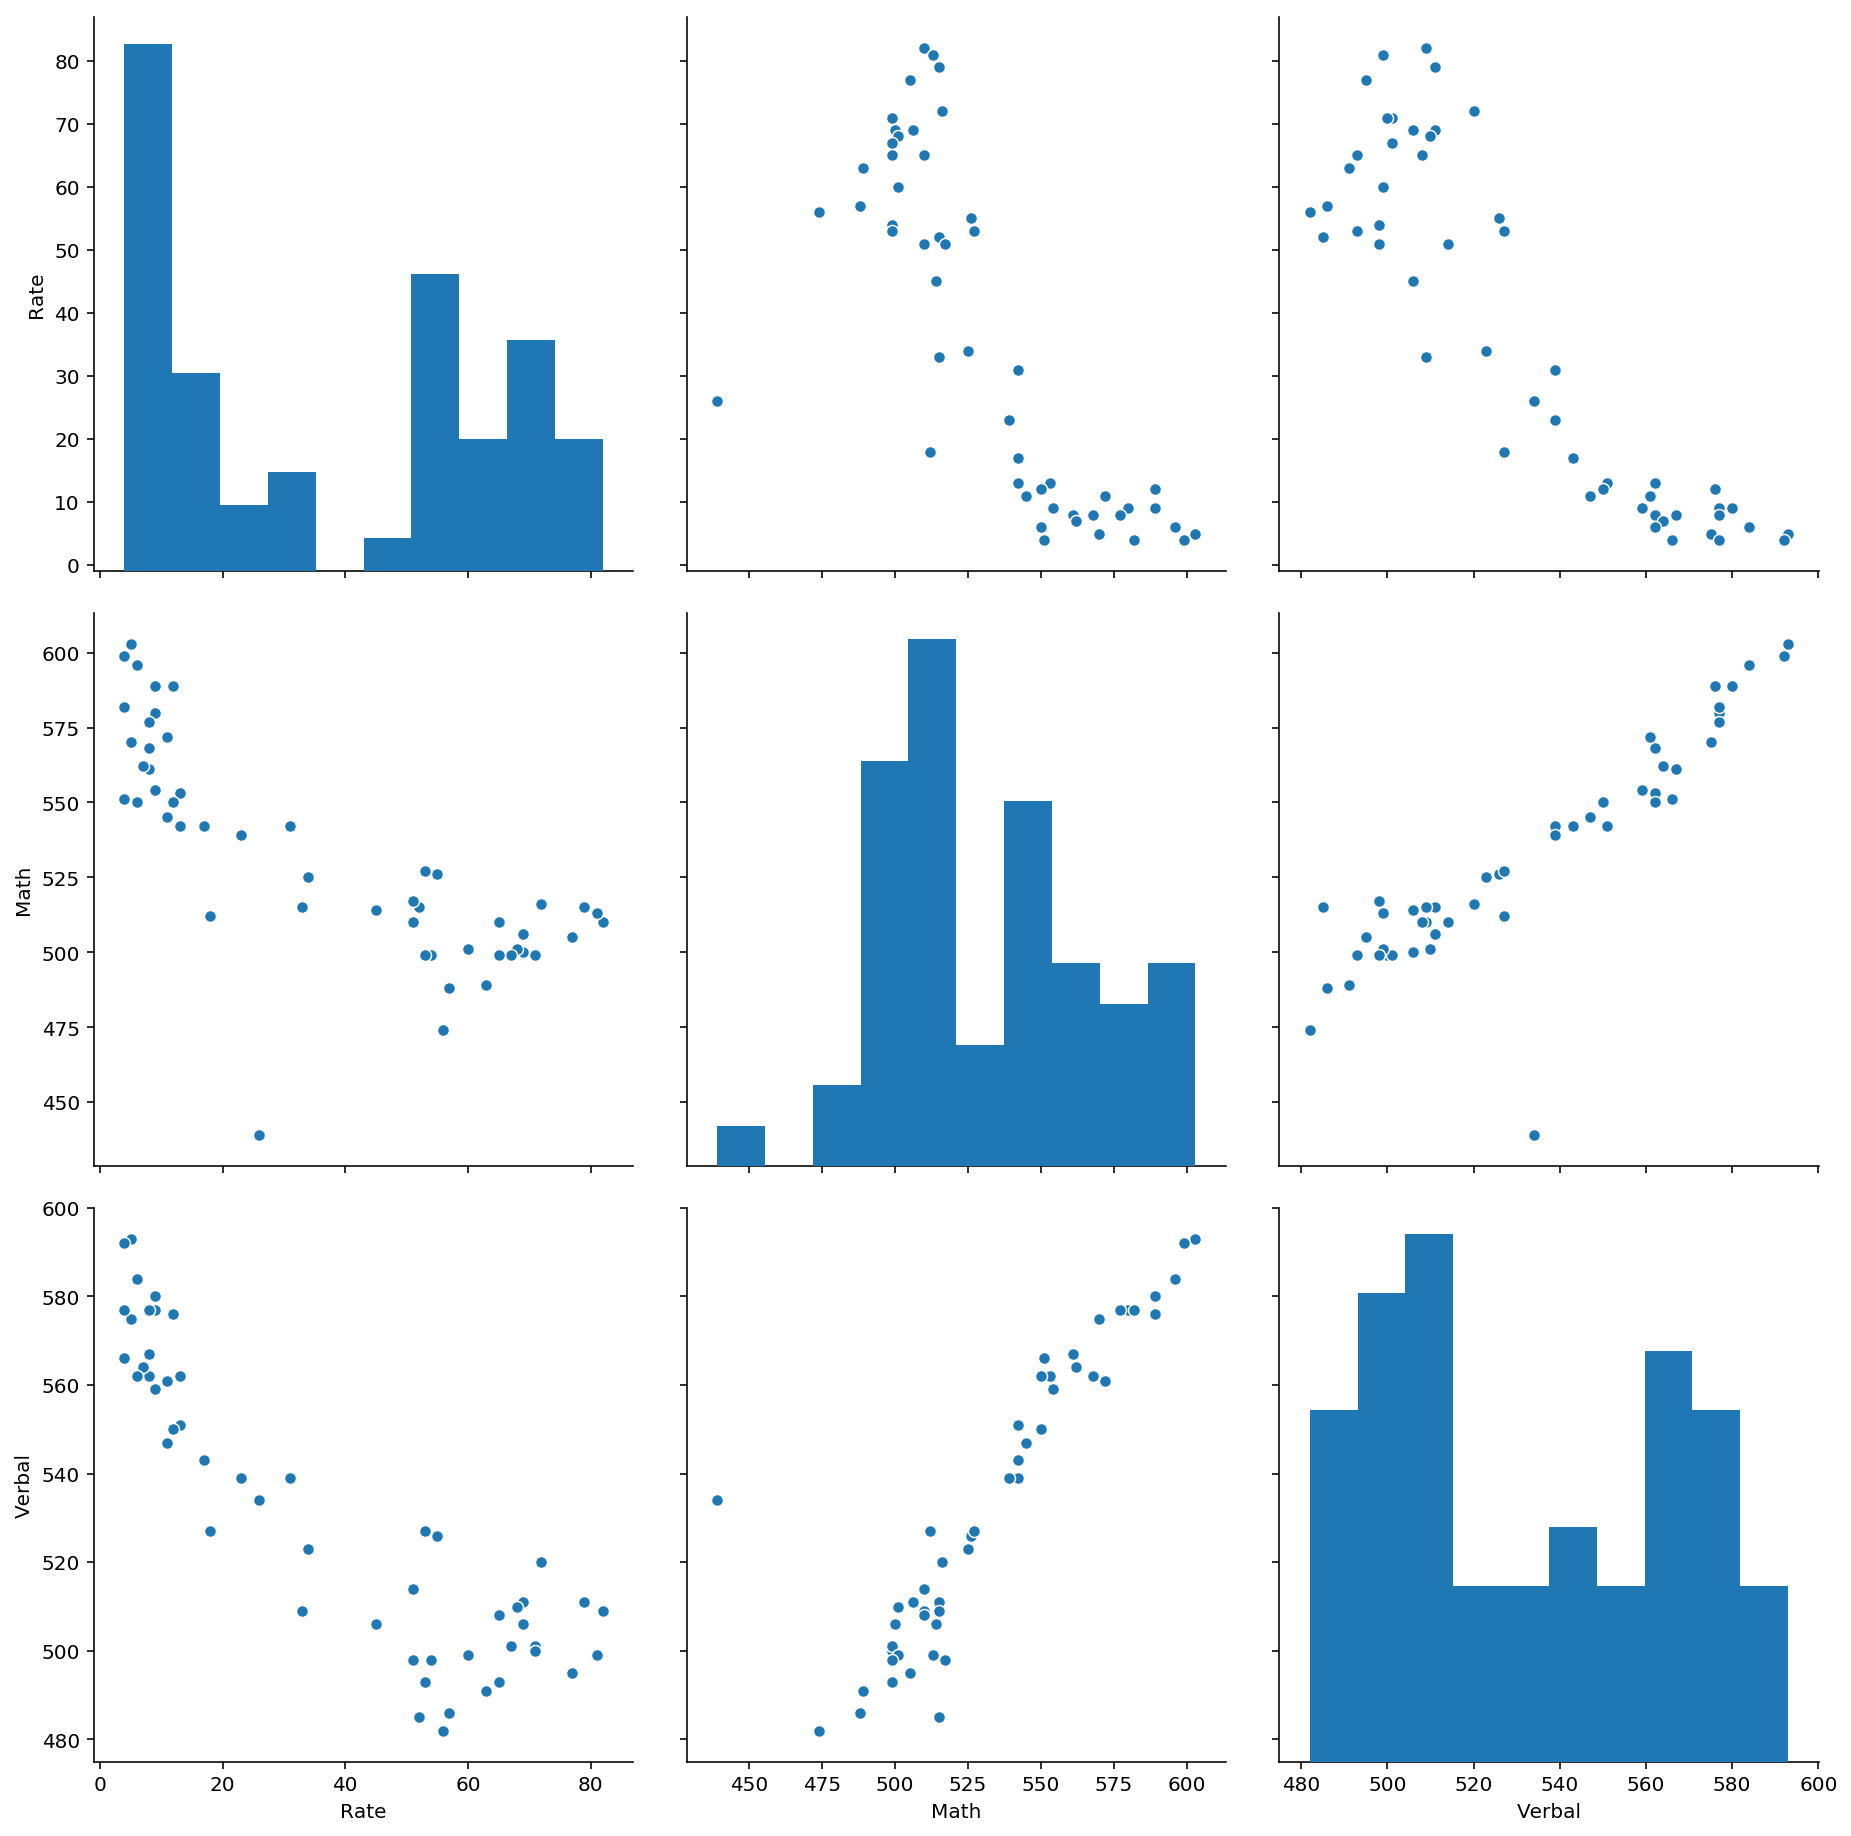

In [68]:
sns.pairplot(sat_df[['Rate','Math','Verbal']], height=4.3)

plt.show()


<font color='blue'>

#### Observations:

1. There is a negative correlation between Passing Rate (Rate) and both Math and Verbal scores.
2. Math and Verbal scores are positively correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

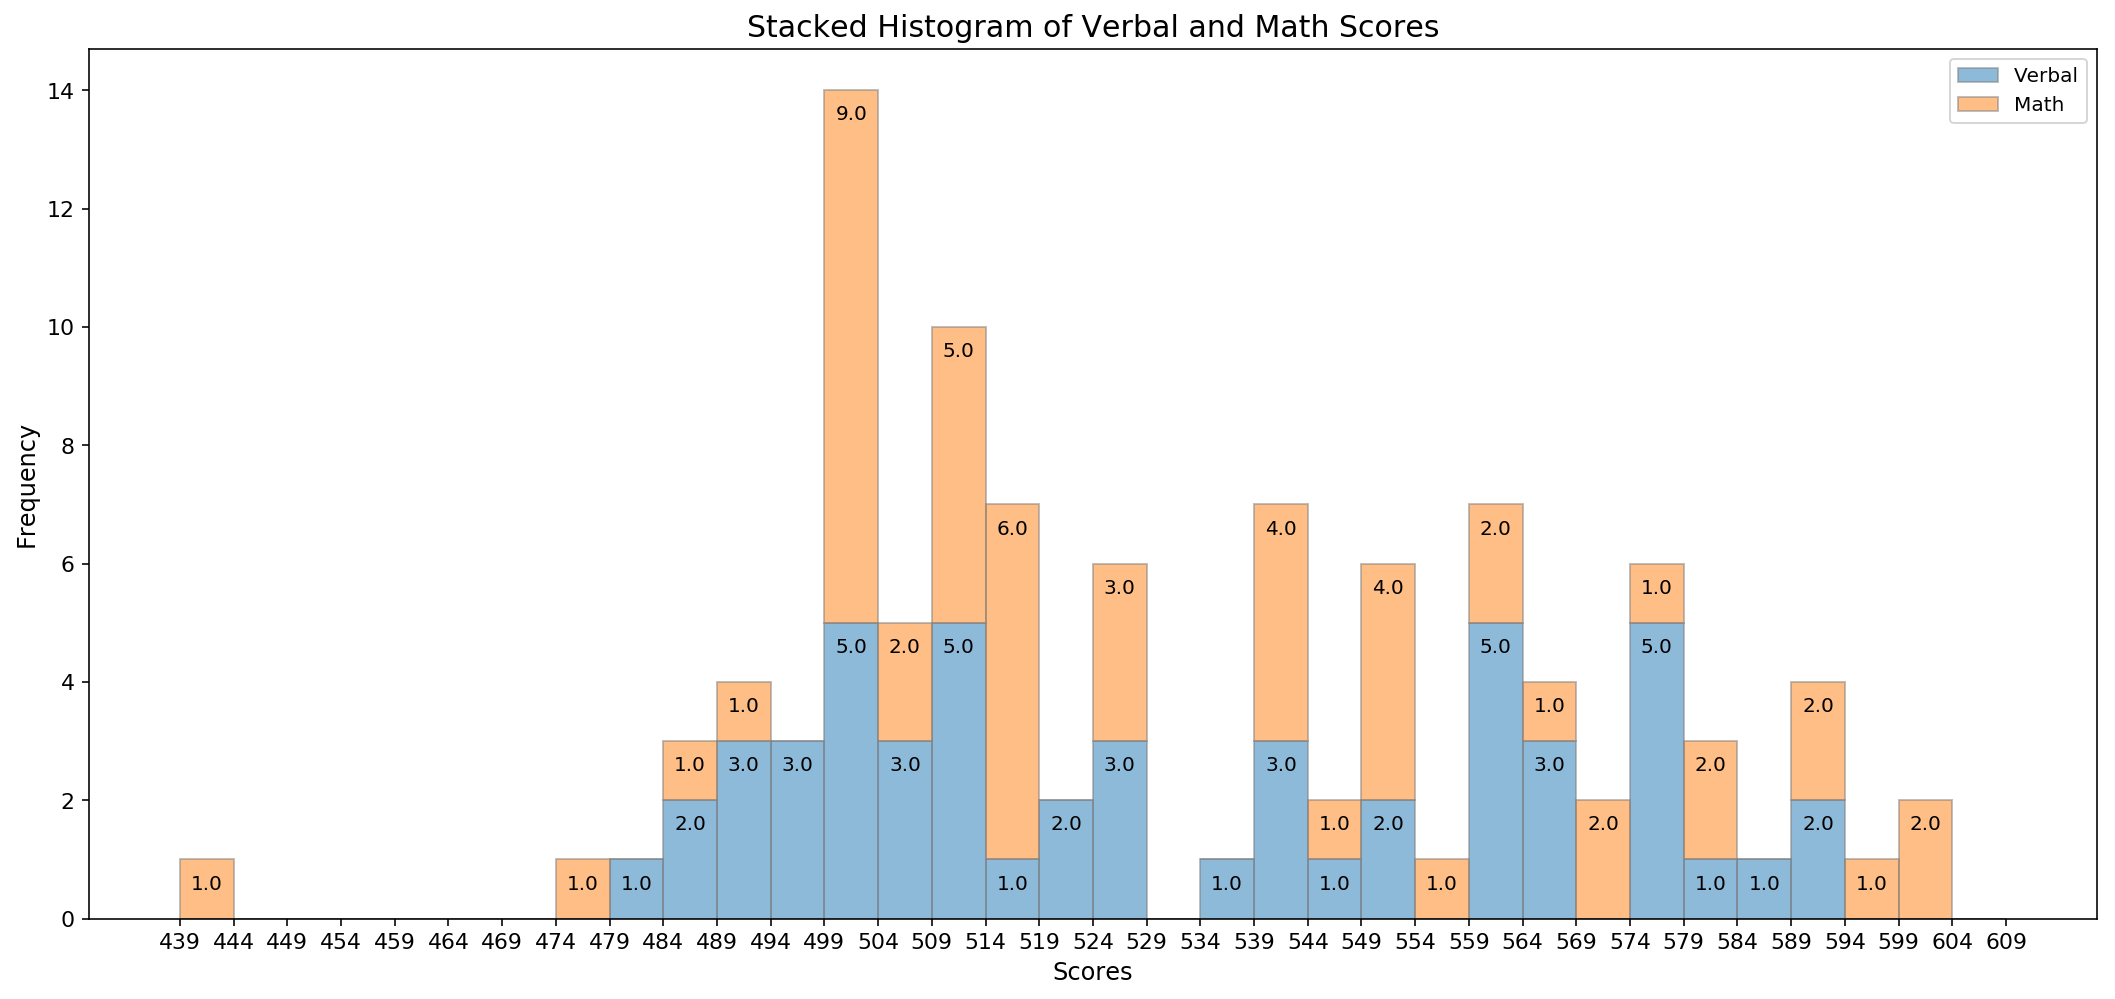

In [69]:
#Stacked Histogram of Verbal and Math

fig, ax = plt.subplots(figsize=(18,8))

ax = sat_df[['Verbal','Math']].plot(kind='hist', bins=np.arange(sat_df['Math'].min(), sat_df['Math'].max()+10, 5), 
                                    edgecolor = "gray", linewidth=1, fontsize=11, alpha=0.5, stacked=True, ax=ax)

#Set the x and y ticks paramenters
ax.set_xticks(np.arange(sat_df['Math'].min(), sat_df['Math'].max()+10, 5))
ax.tick_params(axis='both', labelsize=11)


#Set the x-y label parameters
ax.set_xlabel('Scores', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

#Set the plot title
ax.set_title('Stacked Histogram of Verbal and Math Scores', fontsize=15)

#Annotate bar values
for i in ax.patches:
    if i.get_height() ==0:
        pass
    else:
        ax.annotate(i.get_height(), (i.get_x()+i.get_width()/2, i.get_y()+i.get_height()-0.5), 
                    ha='center', fontsize=10)

plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

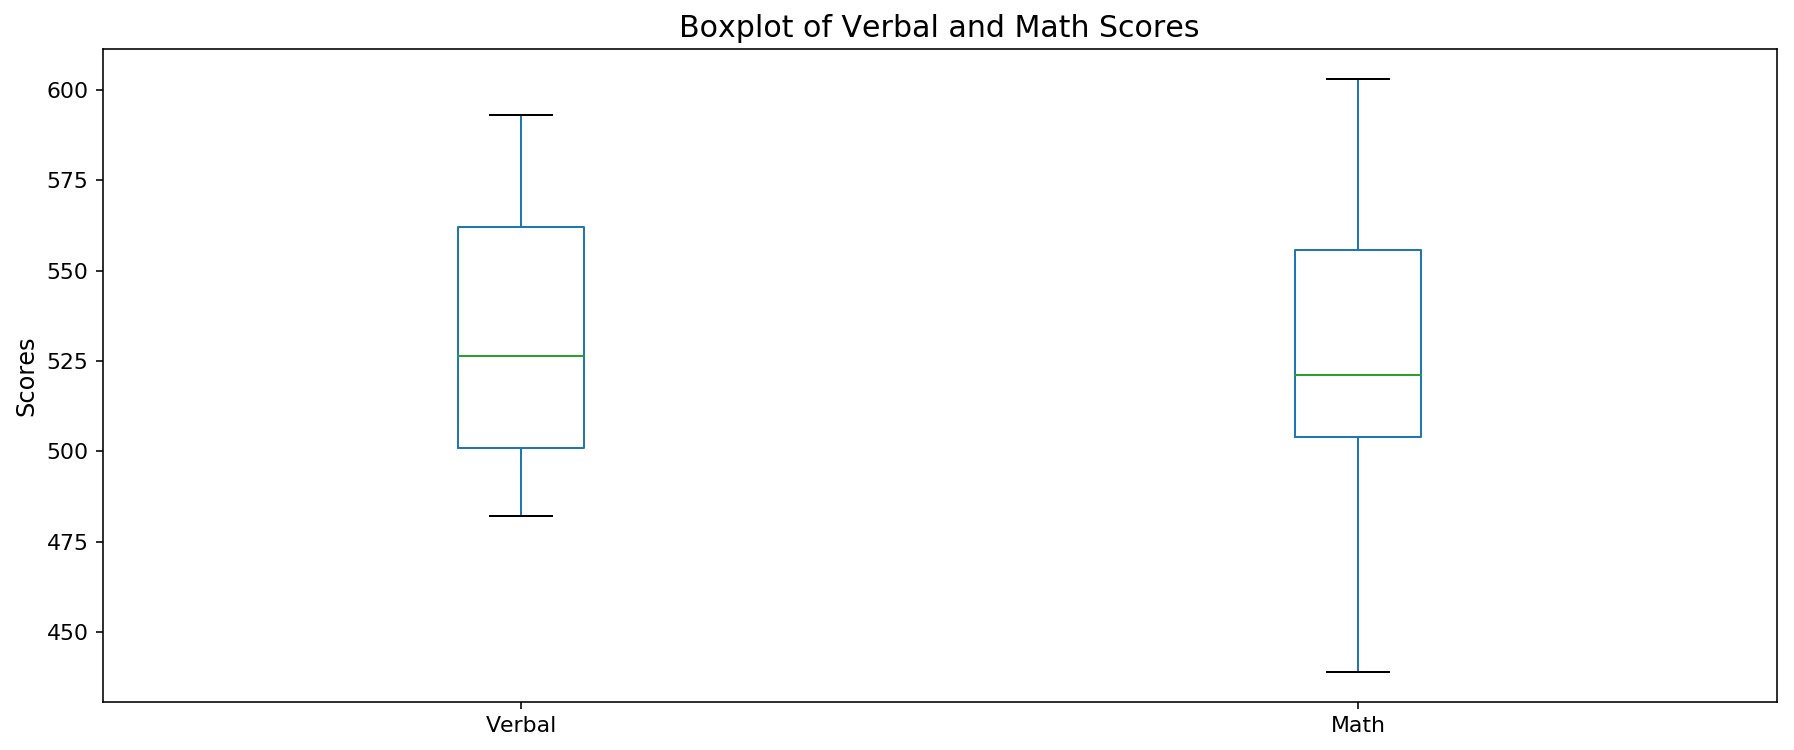

In [70]:
#Boxplot of Verbal and Math

fig, ax = plt.subplots(figsize=(15,6))

ax = sat_df[['Verbal','Math']].plot(kind='box', fontsize=11, ax=ax)

#Set the y label parameters
ax.set_ylabel('Scores', fontsize=12)

#Set the plot title
ax.set_title('Boxplot of Verbal and Math Scores', fontsize=15)

plt.show()

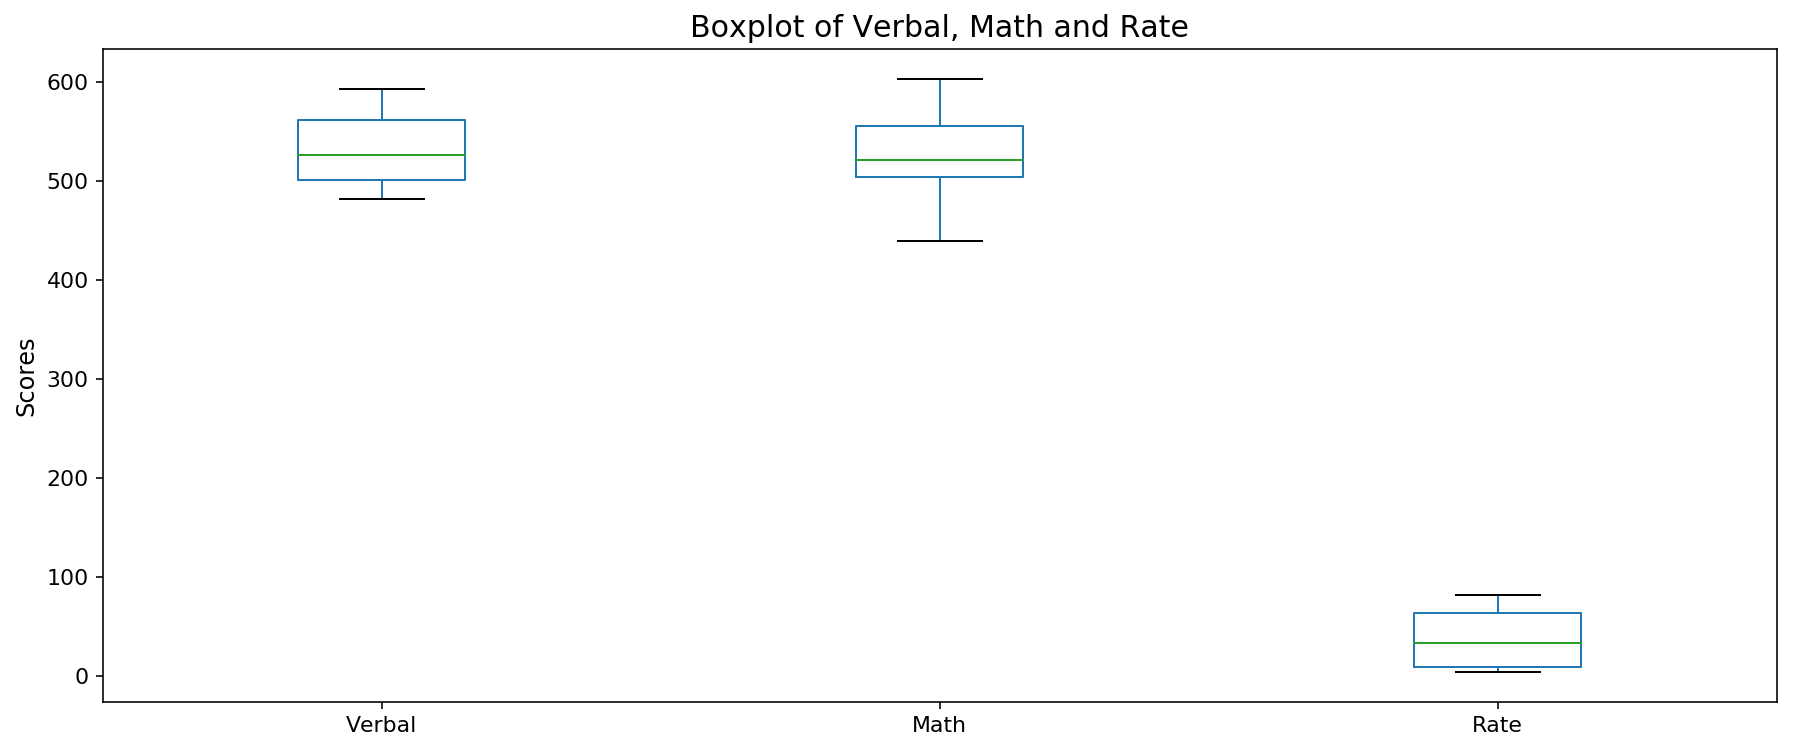

In [71]:
#Boxplot of Verbal, Math and Rate

fig, ax = plt.subplots(figsize=(15,6))

ax = sat_df[['Verbal', 'Math', 'Rate']].plot(kind='box', fontsize=11, ax=ax)

#Set the y label parameters
ax.set_ylabel('Scores', fontsize=12)

#Set the plot title
ax.set_title('Boxplot of Verbal, Math and Rate', fontsize=15)

plt.show()

<font color='blue'>

#### Answer:

The values in Rate are of different scale to both Verbal and Math, resulting in the boxplots being compresssed to accommodate the plots in the same chart. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<font color='blue'>

#### Answer:

Given that boxplot is commonly used to observe the measure of central tendency or spread of the data, we can normalize the variables Verbal, Math and Rates such that the mean=0, and standard deviation=1.

By normalizing the variables, we lose information of the actual variable values, but the distribution of the data is still maintained.

From the plotted chart below, we can clearly see that the the Math scores are more widely distributed than Rate and Verbal.

In [72]:
#Normalize the variables Rate, Verbal and Math in the SAT DF

sat_df_norm = sat_df[['Rate', 'Verbal', 'Math']].apply(lambda x: (x-np.mean(x))/np.std(x))

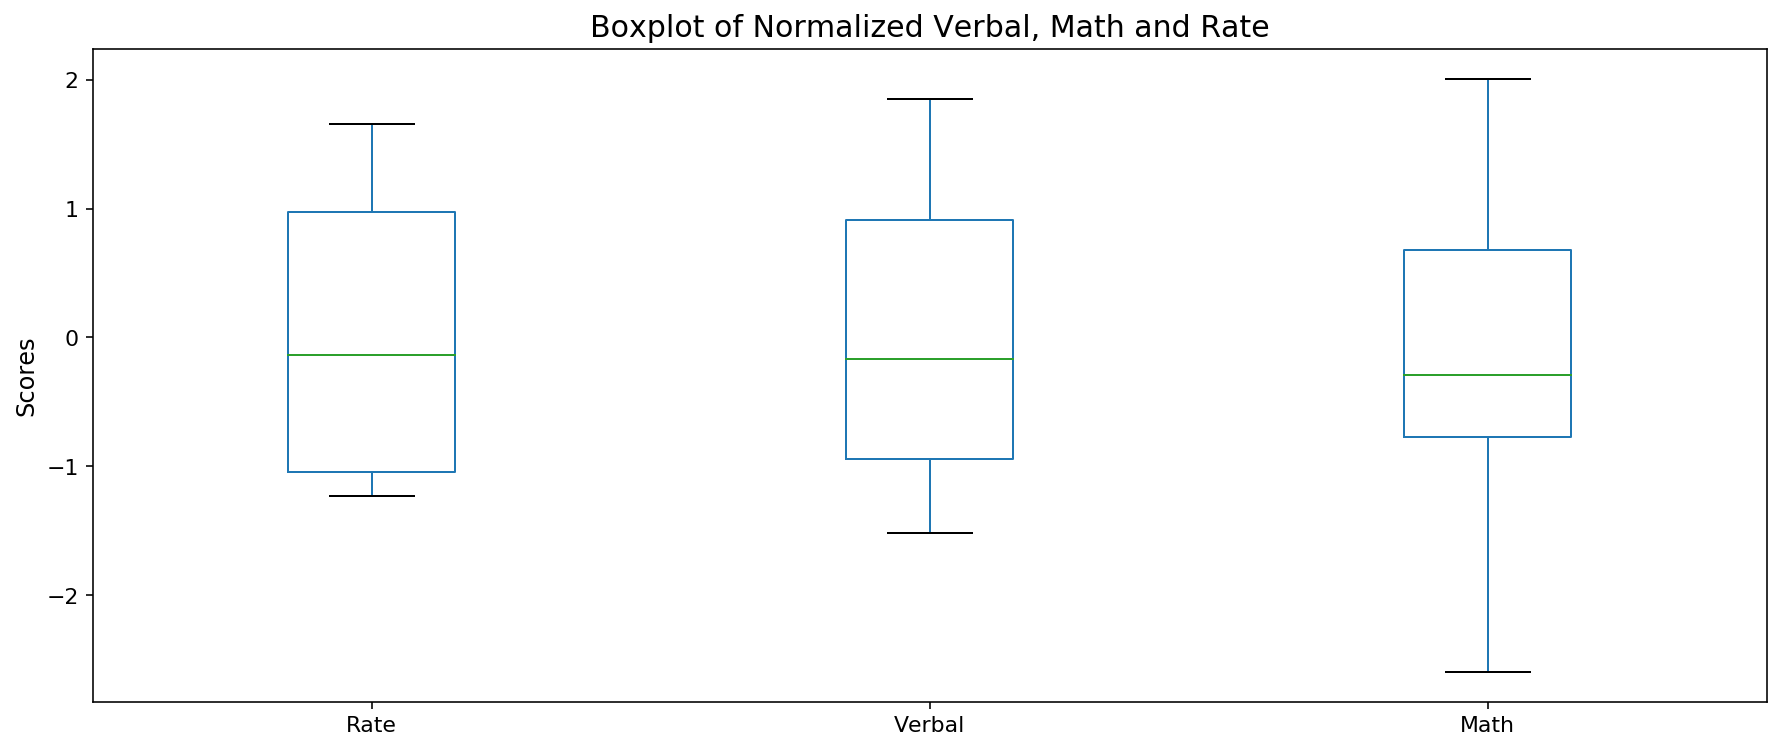

In [73]:
#Boxplot of normalized Verbal, Math and Rate

fig, ax = plt.subplots(figsize=(15,6))

ax = sat_df_norm.plot(kind='box', fontsize=11, ax=ax)

#Set the y label parameters
ax.set_ylabel('Scores', fontsize=12)

#Set the plot title
ax.set_title('Boxplot of Normalized Verbal, Math and Rate', fontsize=15)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [74]:
verb_above_avg = sat_df[sat_df['Verbal']>np.mean(sat_df['Verbal'])][['State']]

verb_above_avg.head()

,State
26,CO
27,OH
28,MT
30,ID
31,TN


In [75]:
print("Number of states with Verbal scores above the average Verbal scores: {}" .format(len(verb_above_avg)))

Number of states with Verbal scores above the average Verbal scores: 24


<font color='blue'>

#### Observation:

The number of above average states, 24 is approximately half of the total states, 52. This means that the distribution of the Verbal scores is symmetrical.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [76]:
verb_above_median = sat_df[sat_df['Verbal']>np.median(sat_df['Verbal'])][['State']]

verb_above_median.head()

,State
19,WA
26,CO
27,OH
28,MT
29,WV


In [77]:
len(verb_above_median)

26

<font color='blue'>

#### Observation:

The number of states with Verbal scores above median score, 26 is exactly half the total number of states, 52 as expected, because the median score is the middle score dividing the data in half.

The number of above average states, 24 is lower than the median, which means that mean score is higher than the median score. The distribution is positively skewed.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [78]:
sat_df['Verb-Math'] = sat_df['Verbal'] - sat_df['Math']

sat_df.head()

,State,Rate,Verbal,Math,Verb-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [79]:
#Top 10 States with largest gap between Verbal and Math Scores, where Verbal > Math

verb_math = sat_df.sort_values(by='Verb-Math', ascending=False).iloc[:10]

verb_math.head(3)

,State,Rate,Verbal,Math,Verb-Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [80]:
#Top 10 States with largest gap between Verbal and Math Scores, where Math > Verbal

math_verb = sat_df.sort_values(by='Verb-Math', ascending=True).iloc[:10]

math_verb.head(3)

,State,Rate,Verbal,Math,Verb-Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [81]:
sat_df[['Rate','Verbal','Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<font color='blue'>

#### Answer:

The correlation matrix shows that:
1. There are strong negative correlation between Rate-Verbal and Rate-Math.
2. There is strong positive correlation between Verbal and Math scores.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [82]:
sat_df.describe()

,Rate,Verbal,Math,Verb-Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<font color='blue'>

#### Answer:

1. Count: There are a total of 52 data points for each of the variables.
2. Mean: Shows the mean value for each column.
3. Std: Shows the standard deviation for each column.
4. Min: Shows the smallest value for each column.
5. 25%: Shows the 25th percentile value for each column.
6. 50%: Shows the 50th percentile or Median value for each column.
7. 75%: Shows the 75th percentile value for each column.
8. Max: Shows the largest value for each column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [83]:
sat_df[['Rate','Verbal','Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<font color='blue'>

#### Answer:

1. The covariance matrix shows the same 'direction' as the correlation matrix, i.e. positive or negative values between pairs. However, the magnitude of the covariance matrix values are larger.

2. Covariance is converted to correlation by dividing the standard deviation values of the paired variables.

3. Correlation matrix is preferred as the value is normalized, such that it is not affected by the scale of the original variables. With this normalization, we can compare between different variable pairs by the magnitude of the correlation values and conclude which pair has the stronger correlation.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [84]:
data = "./drug-use-by-age.csv"

df = pd.read_csv(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

<font color='blue'>

#### Observations:

1. There are no null data in all variables, indicating no missing data.

2. However, variables 'age', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency',
   'oxycontin-frequency' and 'meth-frequency' are in Object data type rather than int or float as expected.  
   This indicates possibility of missing or odd data in these variable.

In [85]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354,4707,4591,2628,2864,7391,3923,2448
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
alcohol-frequency,3,6,5,6,10,13,24,36,48,52,52,52,52,52,52,52,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
marijuana-frequency,4,15,24,25,30,36,52,60,60,52,52,60,52,72,48,52,36
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8,4.5,4,3.2,2.1,1.5,0.9,0
cocaine-frequency,5.0,1.0,5.5,4.0,7.0,5.0,5.0,5.5,8.0,5.0,5.0,6.0,5.0,8.0,15.0,36.0,-
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
crack-frequency,-,3.0,-,9.5,1.0,21.0,10.0,2.0,5.0,17.0,5.0,6.0,6.0,15.0,48.0,62.0,-


<font color='blue'>

#### Observations:

1. Age: There are age range data, causing the age variable to be in string data type. We will leave it as is and 
   treat the 'age' variable as categorical rather than numerical.

2. For the rest of the variables of Object data type, this is due to the '-' string in the dataset. We will clean this up by replacing '-' with 0 and convert the variables to float data type.



In [86]:
''' Clean up the 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 
'oxycontin-frequency' and 'meth-frequency' columns by replacing '-' with 0 and convert to float data type. '''

for col in df.iloc[:,1:].columns:
    if df[col].dtypes == 'O':
        df[col] = df[col].map(lambda x: x.replace("-", '0')).astype(float)
    else:
        pass

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [87]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354,4707,4591,2628,2864,7391,3923,2448
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
alcohol-frequency,3,6,5,6,10,13,24,36,48,52,52,52,52,52,52,52,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
marijuana-frequency,4,15,24,25,30,36,52,60,60,52,52,60,52,72,48,52,36
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8,4.5,4,3.2,2.1,1.5,0.9,0
cocaine-frequency,5,1,5.5,4,7,5,5,5.5,8,5,5,6,5,8,15,36,0
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
crack-frequency,0,3,0,9.5,1,21,10,2,5,17,5,6,6,15,48,62,0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

<font color='blue'>

#### Assumptions:

1. In the original Dataframe, there are two kinds of variables: 1. percentage of users, 2. drug usage frequency.
   We can assume that percentage of users and drug usage frequency are independent from each other, 
   and split these two categories into two separate dataframes to reduce the number of variables:
        - One for percentage or drug users.
        - One for the usage frequency.

2. We will also drop the number of samples from each age group (n) as we will be using the % of users instead.

In [88]:
#Create the percentage user dataframe
use_columns = df.columns[2:28:2].values
df_use = pd.concat([df[['age']], df[use_columns]], axis=1, sort=False)

#Create the usage frequency dataframe
freq_columns = df.columns[3:29:2].values
df_freq = pd.concat([df[['age']], df[freq_columns]], axis=1, sort=False)

In [89]:
df_use

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [90]:
df_freq

,age,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
5,17,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
6,18,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
7,19,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
8,20,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0
9,21,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0


<font color='blue'>

### 1. Explore Percentage of Users for Different Age Groups for the Different Types of Drugs

In [91]:
#High level overview of the data distribution of the variables
df_use.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


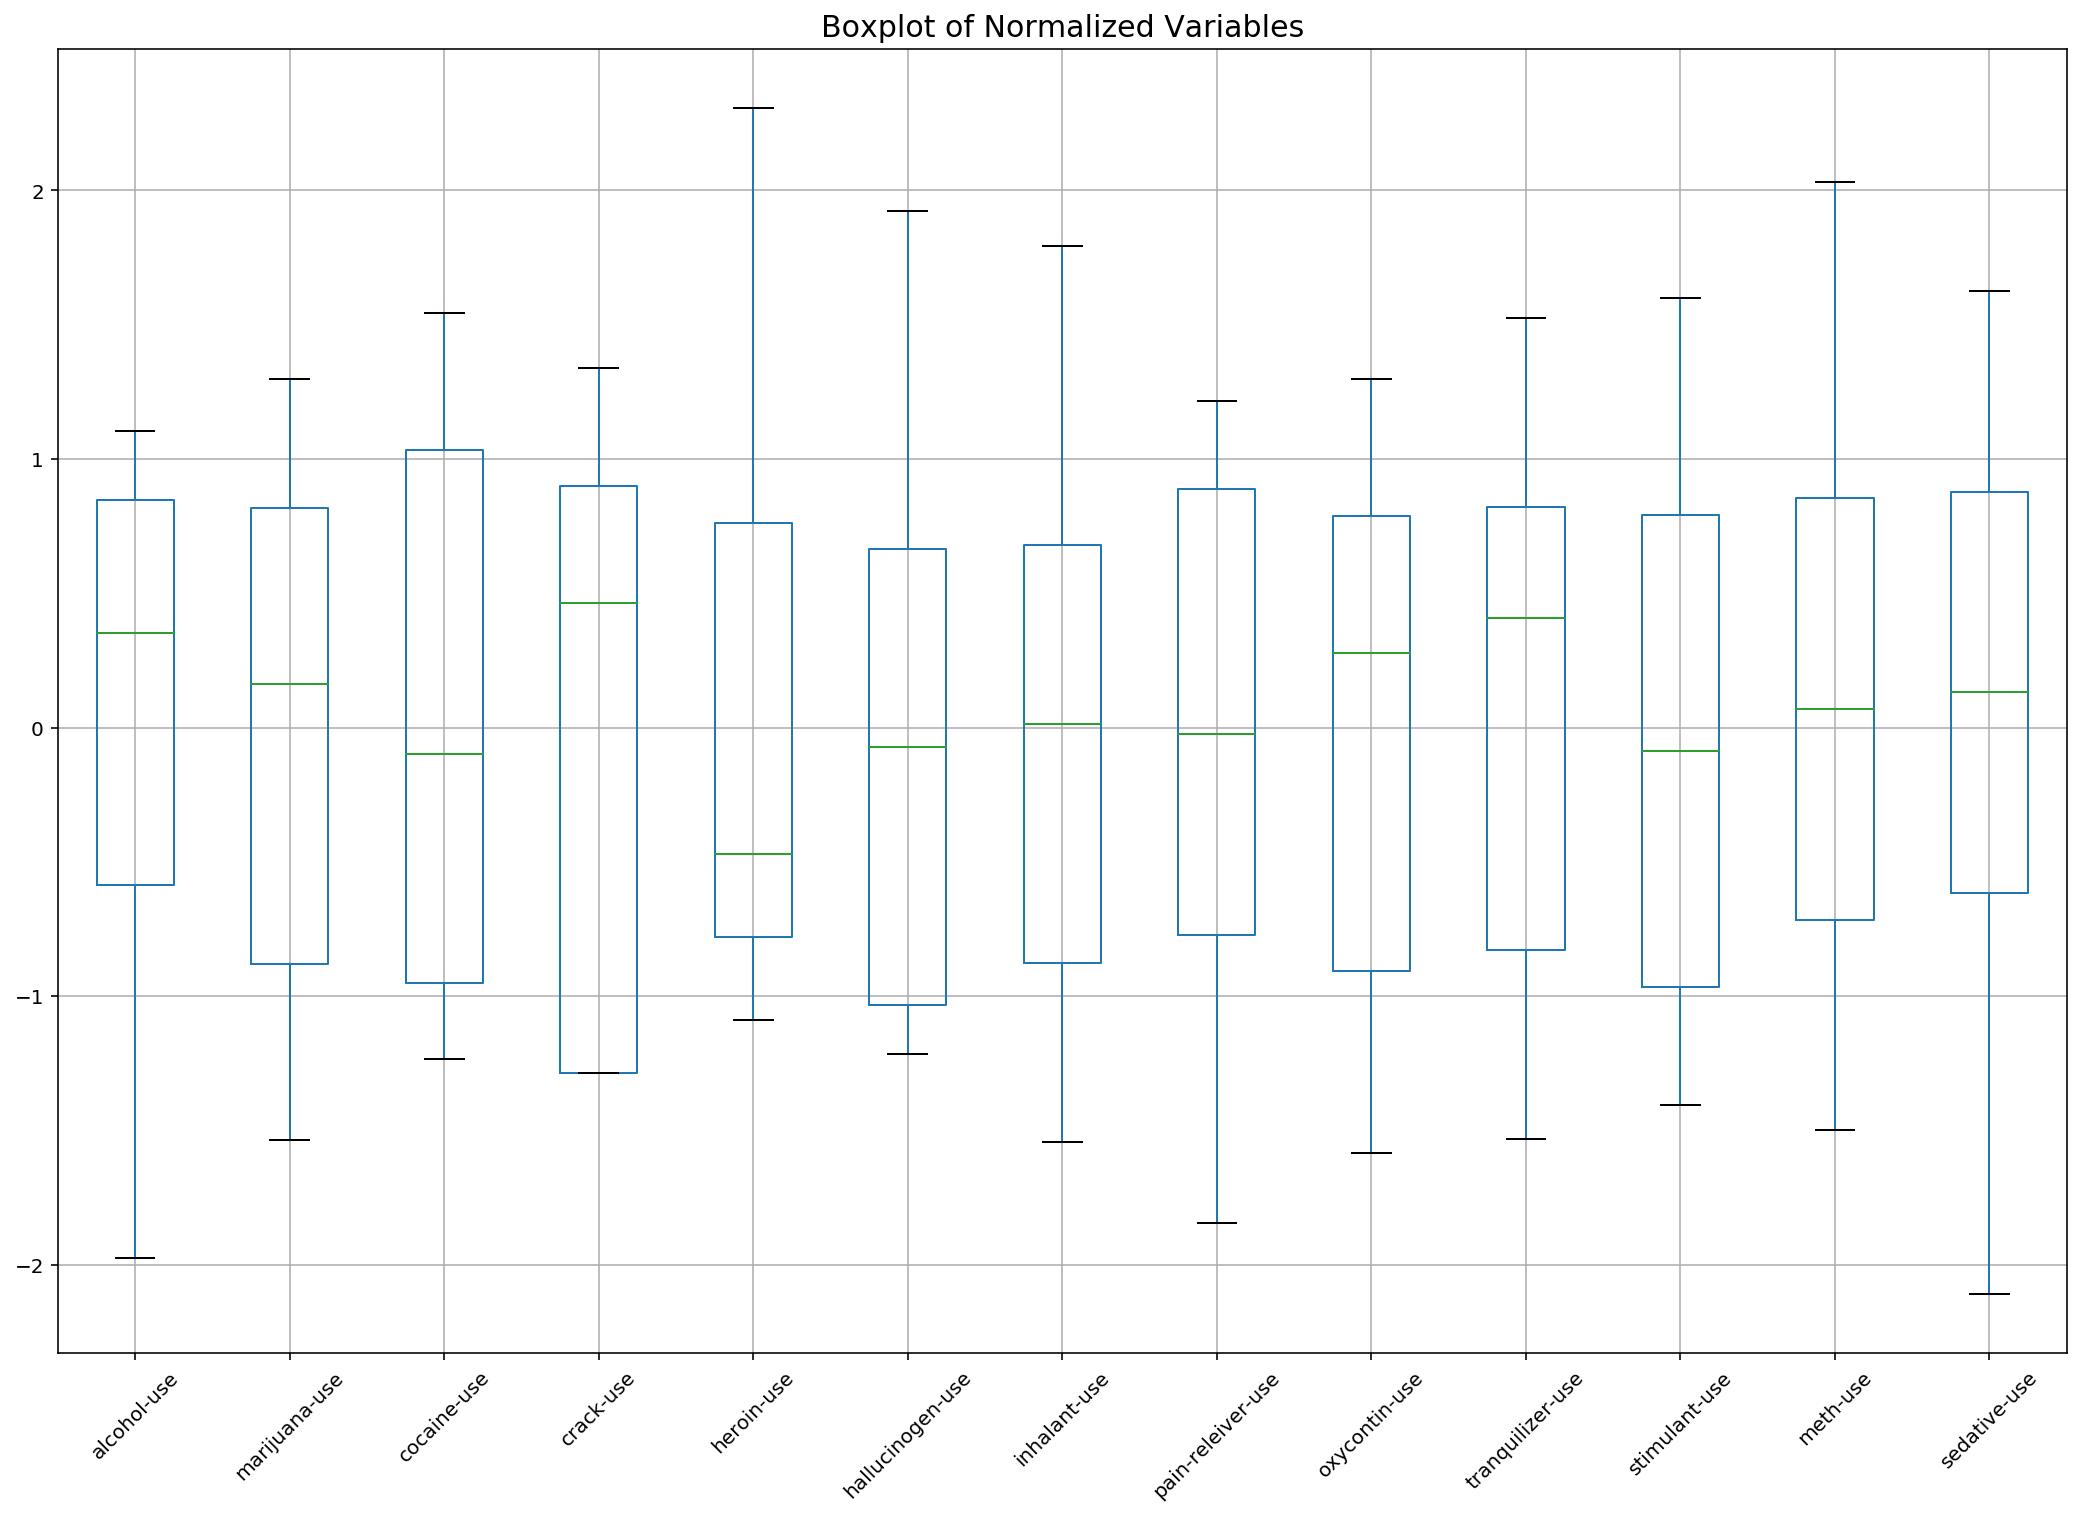

In [92]:
#Check for outliers in the Percentage Users Data for each variable.

#Normalize the variables and plot Boxplot to look for any outliers.
df_use_norm = df_use.iloc[:,1:].apply(lambda x: (x-np.mean(x))/np.std(x))

#Boxplot of Data.

fig, ax = plt.subplots(figsize=(18,12))

ax = df_use_norm.boxplot(rot=45, ax=ax)

#Set the plot title
ax.set_title('Boxplot of Normalized Variables', fontsize=15)

plt.show()

<font color='blue'>

#### Observations:

1. There are no outliers in Percentage Users data.

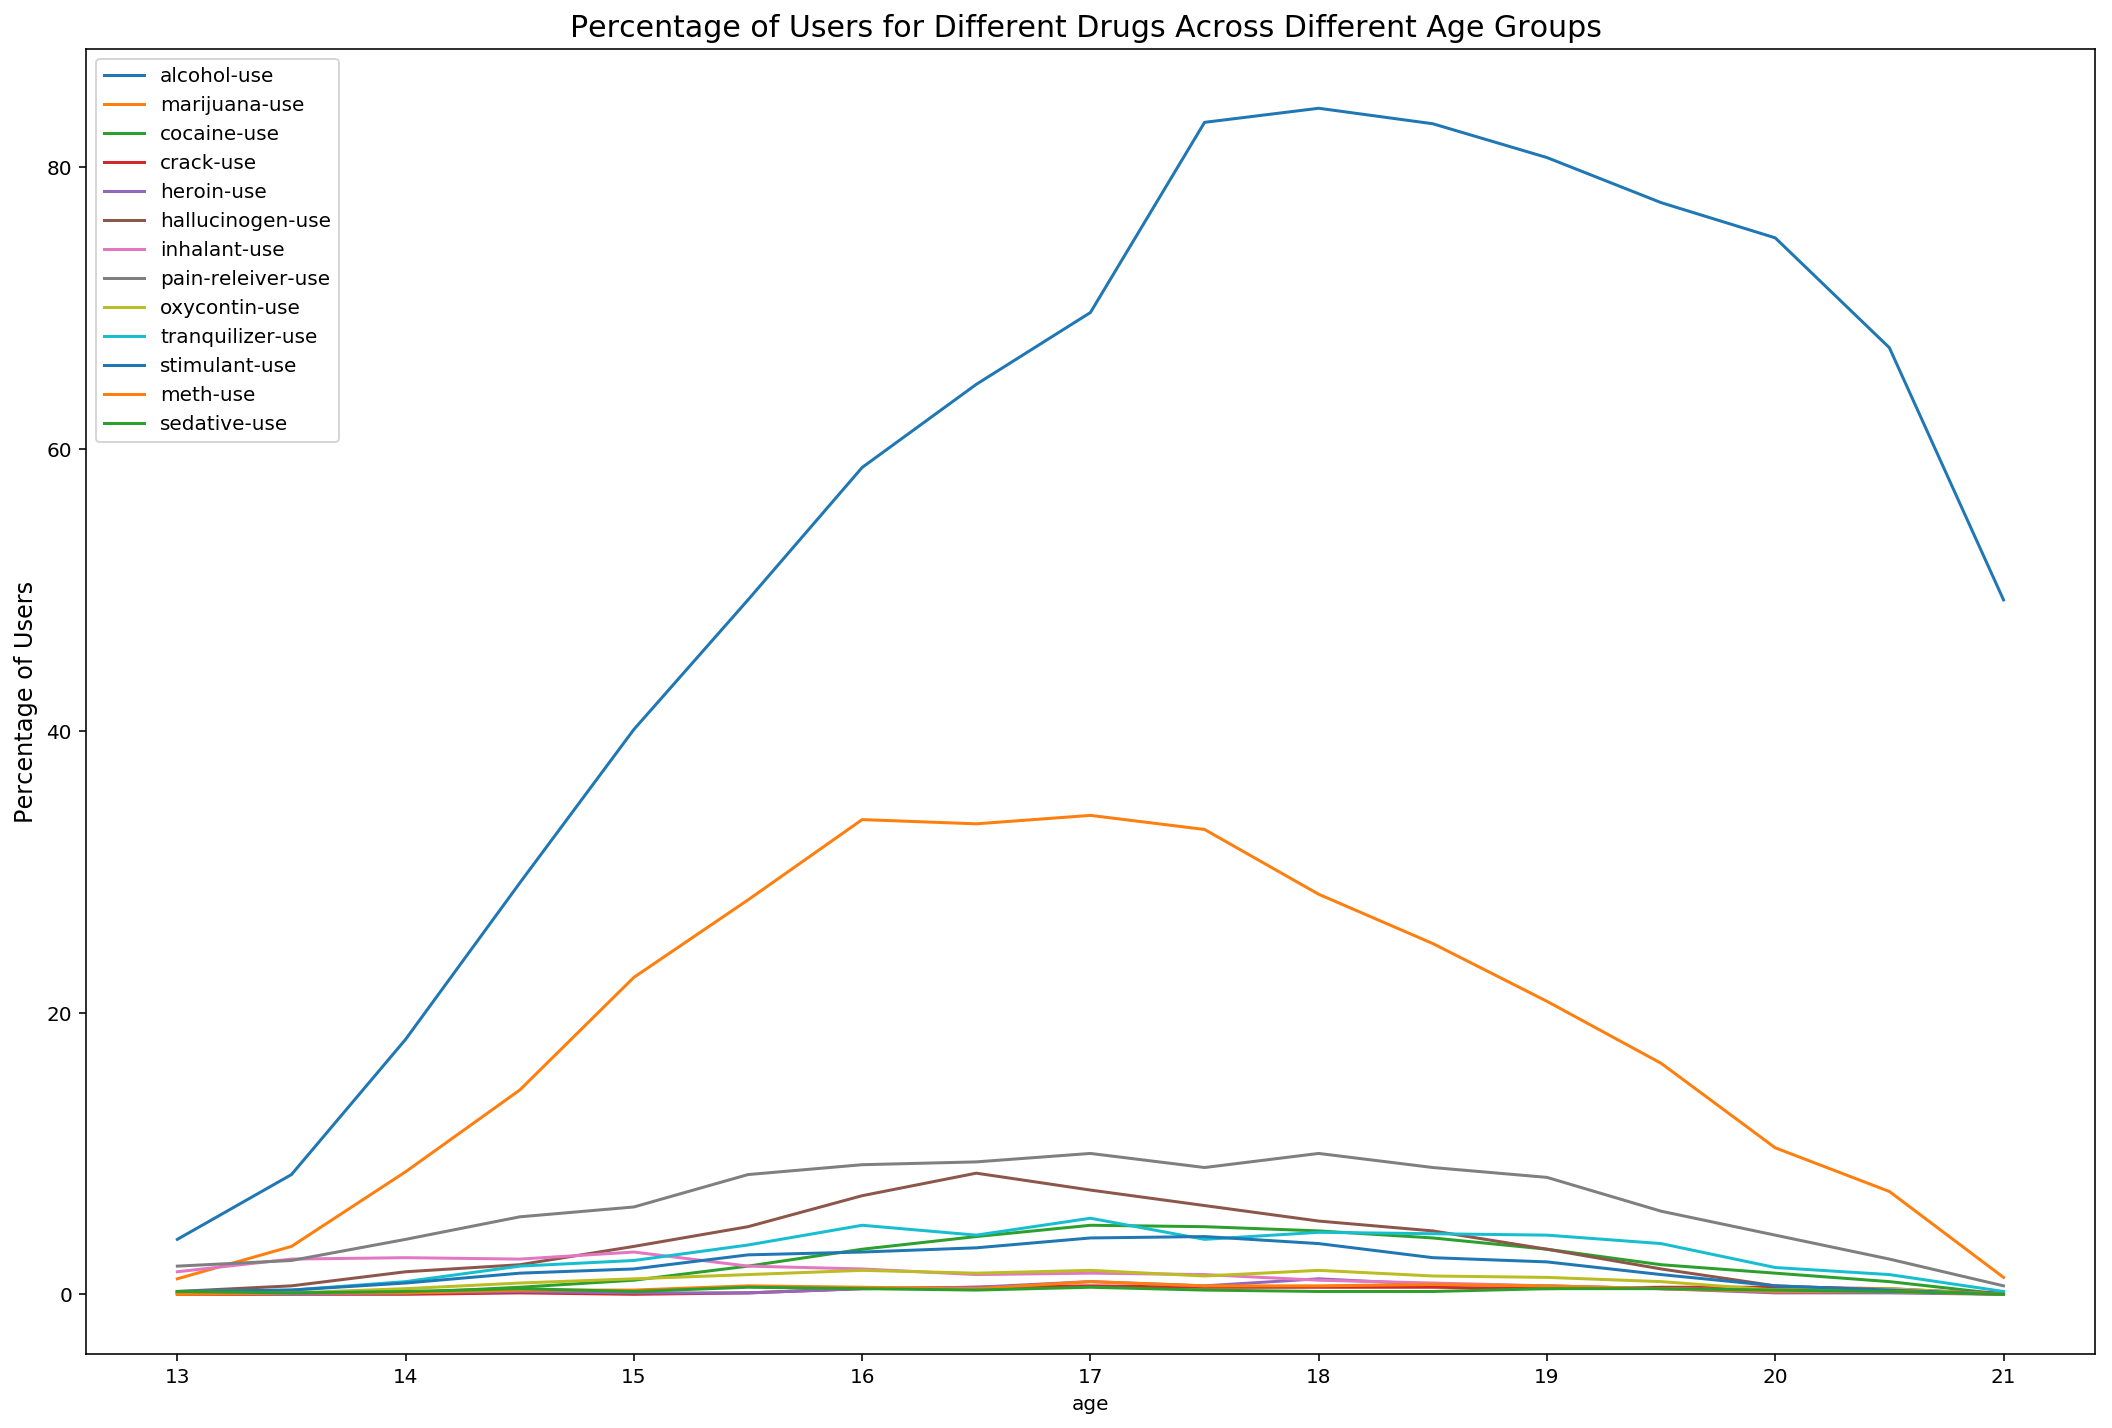

In [109]:
#Plot the percentage of users for the different drug types across the different age groups

fig, ax = plt.subplots(figsize=(18,12))

ax = df_use.plot(x='age', ax=ax)

#Set the x ticks paramenters
ax.set_xticklabels(list(df_use['age'].values))

#Set the x-y label parameters
ax.set_ylabel('Percentage of Users', fontsize=12)

#Set the plot title
ax.set_title('Percentage of Users for Different Drugs Across Different Age Groups ', fontsize=15)


plt.show()

<font color='blue'>

#### Observations:

1. From the line plot, in general we see that percentage of users using drugs increases by age and peaks between age 21-29 before declining.

2. Alcohol use is the highest across all age groups compared to other drugs.

In [94]:
#Look at the correlation between variables.

df_use.corr()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


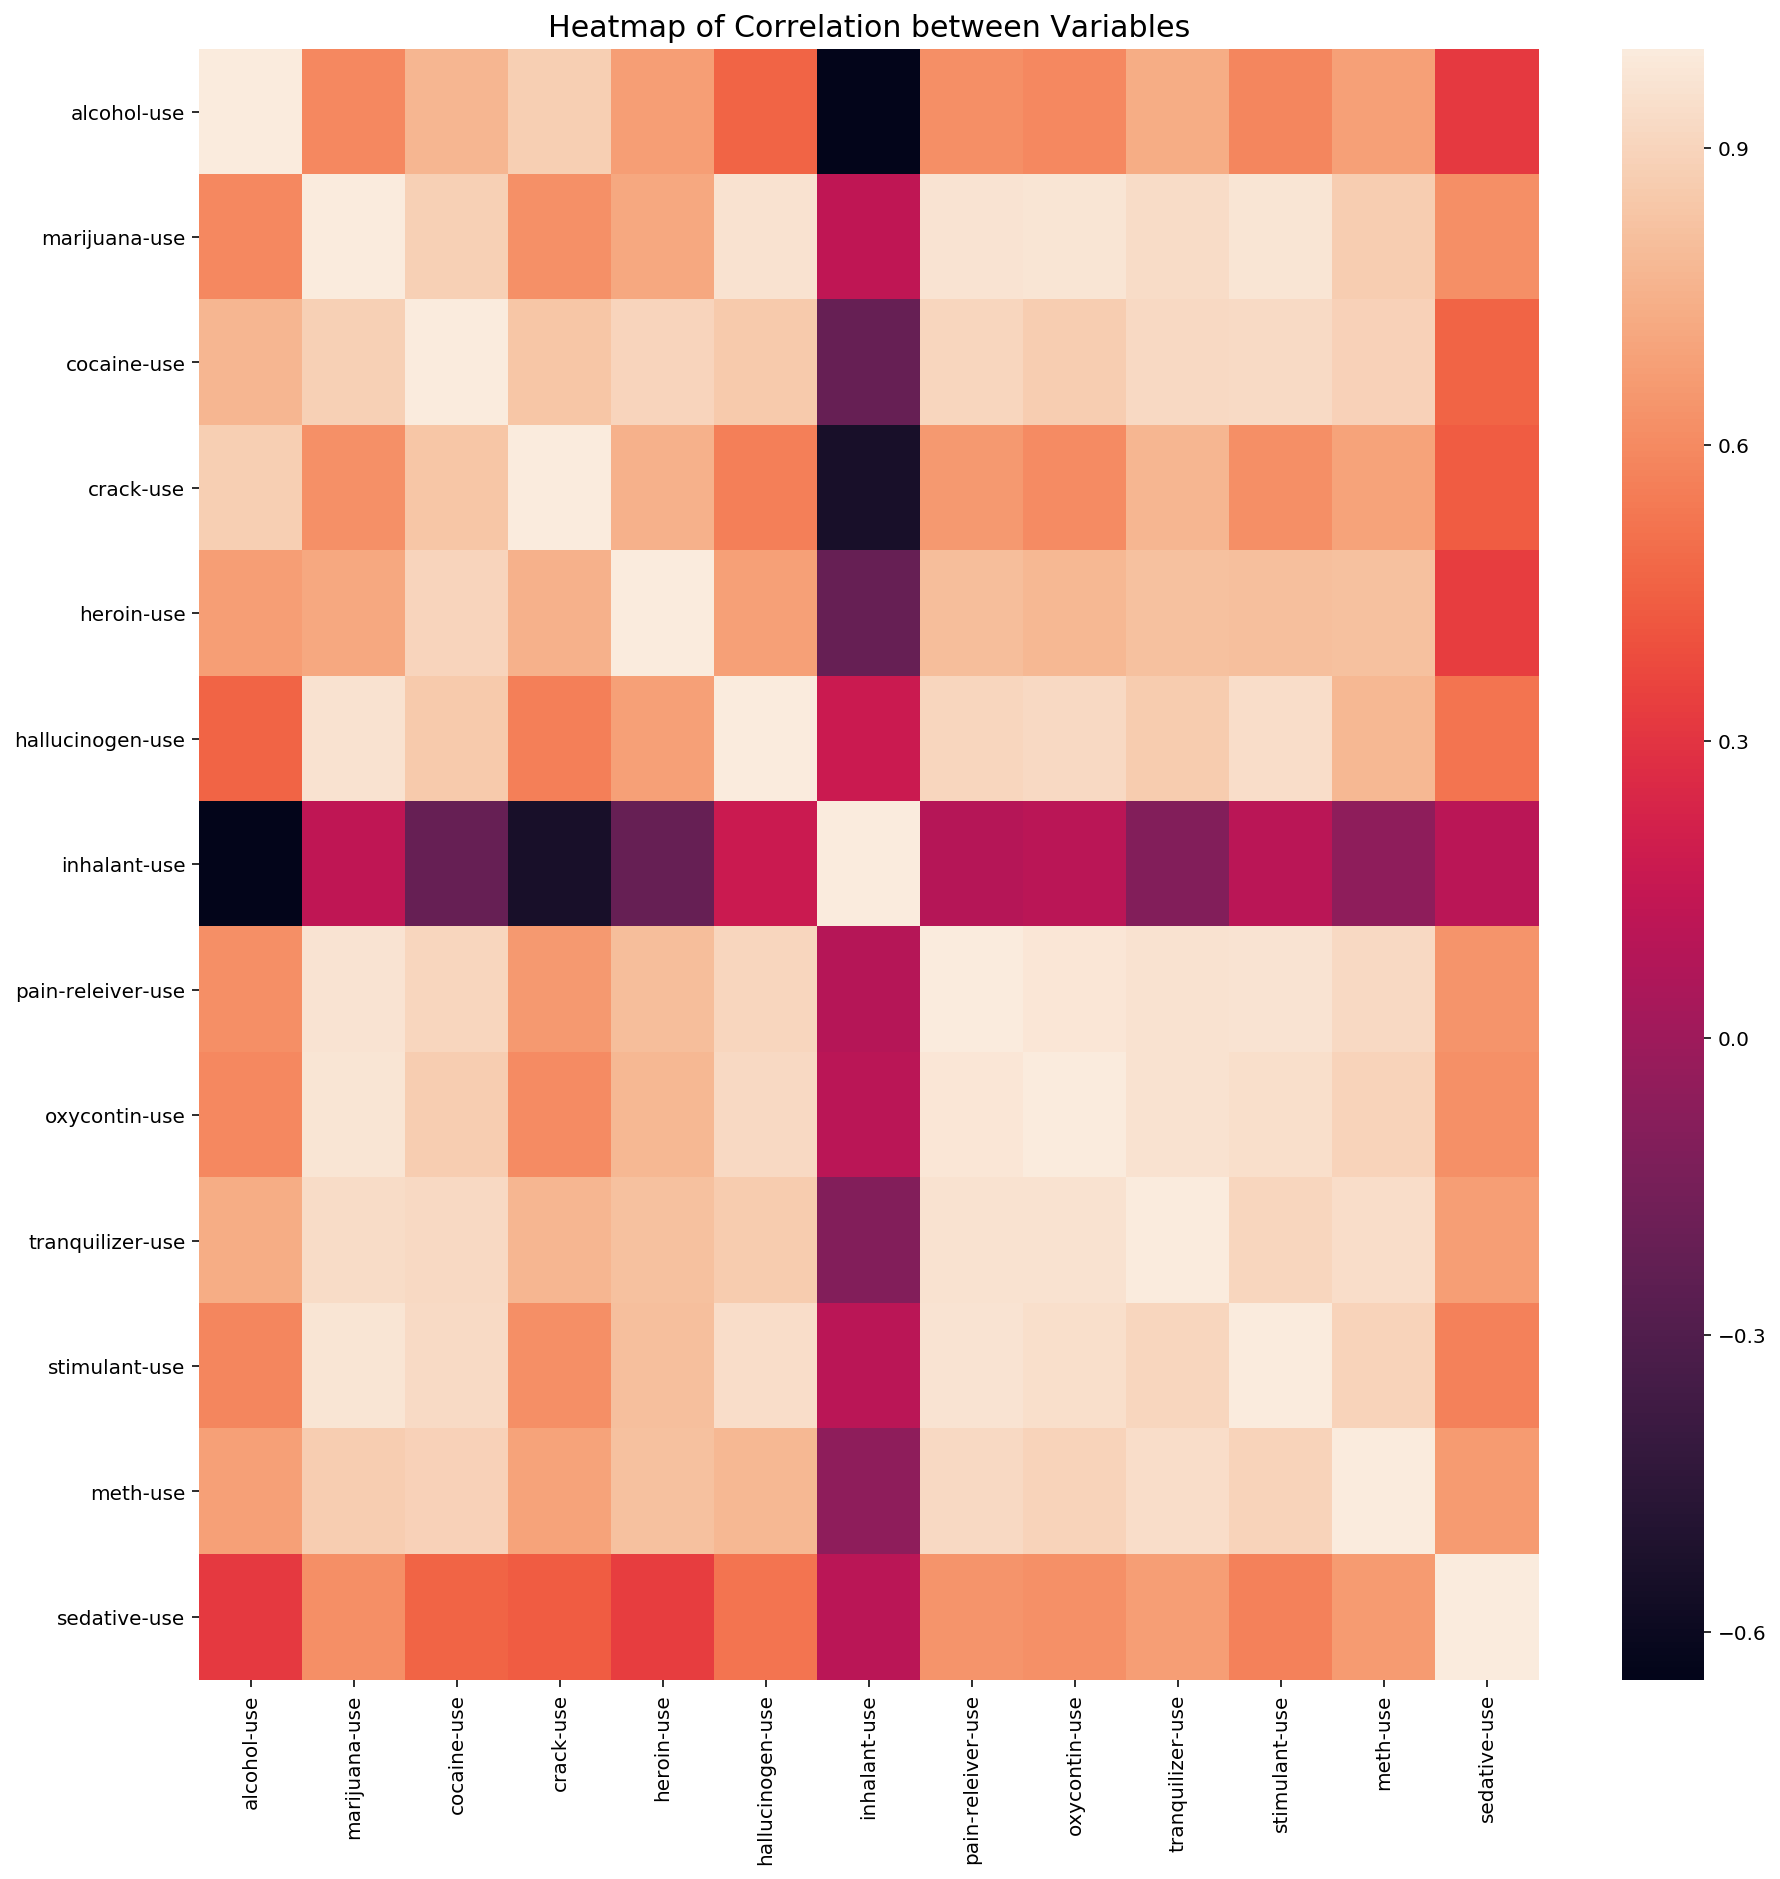

In [95]:
#Plot a Heatmap to better visualize correlation between variables.

fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(df_use.corr(), ax=ax)

#Set the plot title
ax.set_title('Heatmap of Correlation between Variables', fontsize=15)

plt.show()

<font color='blue'>

#### Observations:

1. From the Heatmap, most of the variables have positive correlation with each other.
2. Inhalent is the only exception where there is minimal correlation with other drug uses, and strong negative 
   correlation between Inhalent use to Alcohol and Crack use.

<font color='blue'>

### 2. Explore Frequency of Drug Usage for Different Age Groups for the Different Types of Drugs

In [96]:
#High level overview of the data distribution of the variables
df_freq.describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,42.941176,7.411765,12.382353,68.970588,8.411765,5.794118,14.705882,13.941176,11.735294,31.147059,31.735294,19.382353
std,21.318833,18.362566,8.014119,17.361532,70.153285,15.000245,4.937291,6.935098,12.902134,11.485205,85.973790,32.206423,24.833527
min,3.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.000000,0.000000,4.500000,2.000000,0.000000,3.000000
25%,10.000000,30.000000,5.000000,2.000000,35.500000,3.000000,3.000000,12.000000,5.000000,6.000000,7.000000,10.500000,6.500000
50%,48.000000,52.000000,5.000000,6.000000,50.000000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,24.000000,10.000000
75%,52.000000,52.000000,7.000000,15.000000,66.500000,4.000000,5.500000,15.000000,17.500000,11.000000,12.000000,46.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


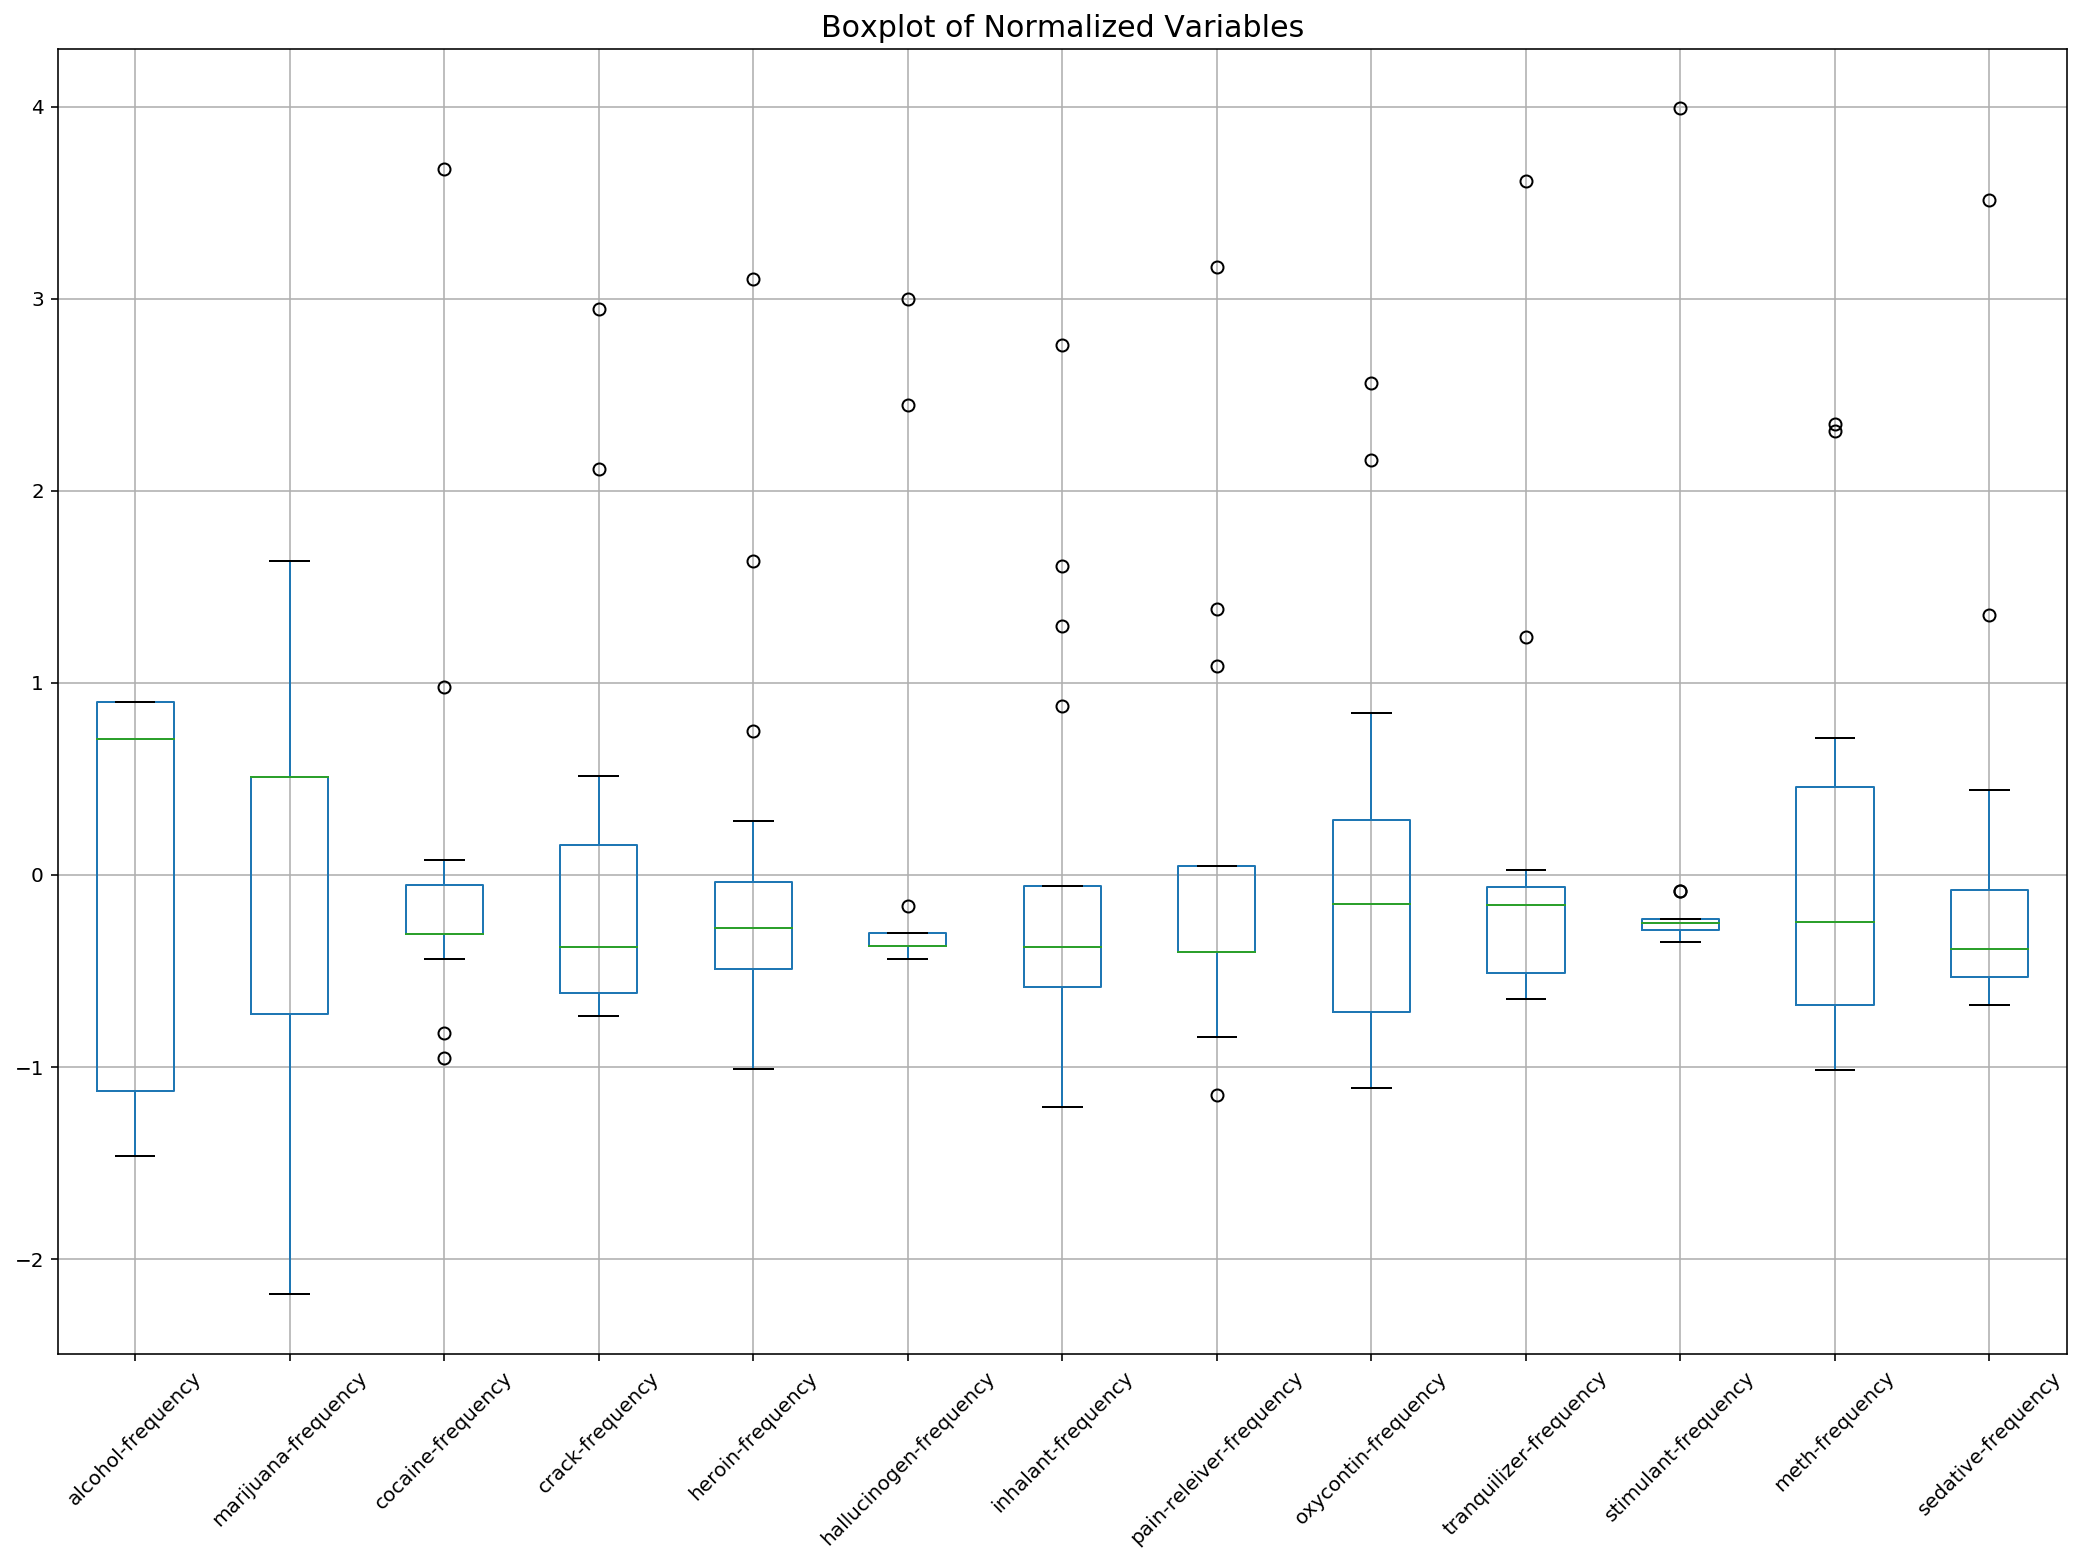

In [97]:
#Check for outliers in the Percentage Users Data for each variable.

#Normalize the variables and plot Boxplot to look for any outliers.
df_freq_norm = df_freq.iloc[:,1:].apply(lambda x: (x-np.mean(x))/np.std(x))

#Boxplot of Data.

fig, ax = plt.subplots(figsize=(18,12))

ax = df_freq_norm.boxplot(rot=45, ax=ax)

#Set the plot title
ax.set_title('Boxplot of Normalized Variables', fontsize=15)

plt.show()

<font color='blue'>

#### Observations:

1. Most of the variables contain outliers. This indicates that the data is highly spread out.

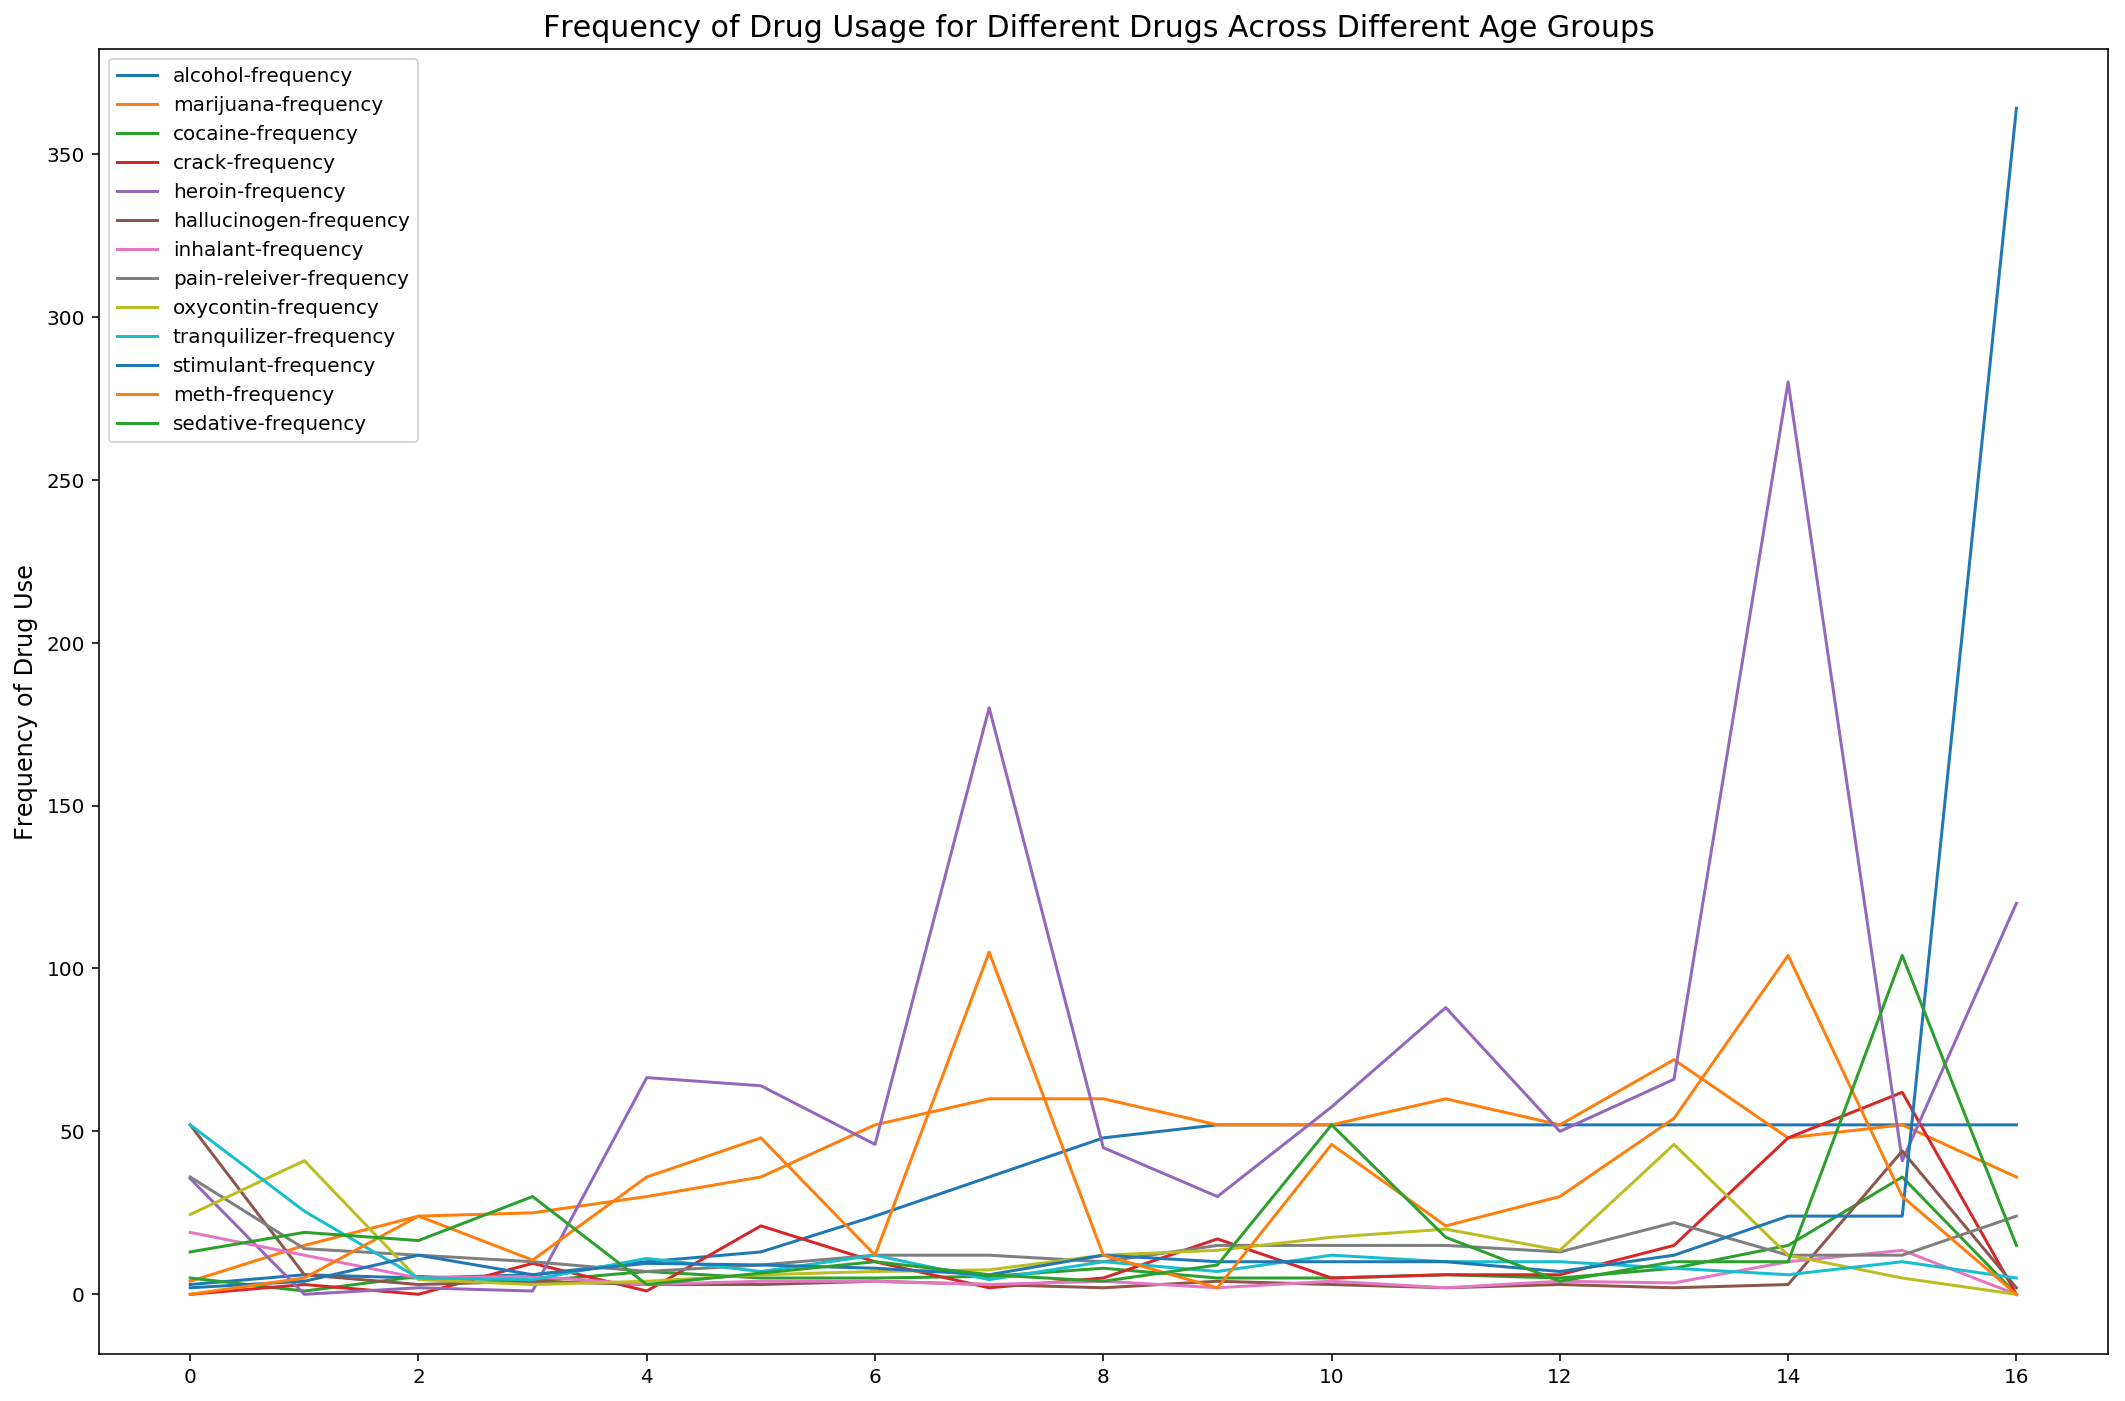

In [108]:
#Plot the frequency of drug usage for the different drug types across the different age groups

fig, ax = plt.subplots(figsize=(18,12))

ax = df_freq.plot(ax=ax)

#Set the x ticks paramenters
#ax.set_xticklabels(list(df_use['age'].values))

#Set the x-y label parameters
ax.set_ylabel('Frequency of Drug Use', fontsize=12)

#Set the plot title
ax.set_title('Frequency of Drug Usage for Different Drugs Across Different Age Groups ', fontsize=15)


plt.show()

<font color='blue'>

#### Observations:

1. In general, there is not much of a trend to the frequency of drug consumption across the different age groups.
2. Usage of heroin is generally higher compared to the other drugs.

In [99]:
#Look at the correlation between variables.

df_freq.corr()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
alcohol-frequency,1.000000,0.818769,0.317172,0.364267,0.432405,-0.174622,-0.351677,0.007087,0.049388,-0.415026,0.260304,0.252246,0.201423
marijuana-frequency,0.818769,1.000000,0.265193,0.273167,0.346001,-0.380430,-0.537857,-0.285292,0.066200,-0.591449,-0.069454,0.417947,0.048777
cocaine-frequency,0.317172,0.265193,1.000000,0.872260,0.143095,0.537645,0.413751,-0.179859,-0.154491,-0.103142,-0.183692,0.240660,0.761572
crack-frequency,0.364267,0.273167,0.872260,1.000000,0.335815,0.341344,0.350775,-0.218321,-0.115546,-0.215342,-0.125405,0.346559,0.602101
heroin-frequency,0.432405,0.346001,0.143095,0.335815,1.000000,-0.188085,-0.089068,-0.033484,-0.148807,-0.264485,0.218212,0.782122,-0.191638
hallucinogen-frequency,-0.174622,-0.380430,0.537645,0.341344,-0.188085,1.000000,0.834993,0.547363,0.061814,0.705734,-0.103980,-0.224738,0.533095
inhalant-frequency,-0.351677,-0.537857,0.413751,0.350775,-0.089068,0.834993,1.000000,0.420682,0.291686,0.766372,-0.296318,-0.075928,0.376364
pain-releiver-frequency,0.007087,-0.285292,-0.179859,-0.218321,-0.033484,0.547363,0.420682,1.000000,0.410163,0.699282,0.324717,-0.291527,-0.045213
oxycontin-frequency,0.049388,0.066200,-0.154491,-0.115546,-0.148807,0.061814,0.291686,0.410163,1.000000,0.433366,-0.292730,-0.028618,-0.113600
tranquilizer-frequency,-0.415026,-0.591449,-0.103142,-0.215342,-0.264485,0.705734,0.766372,0.699282,0.433366,1.000000,-0.180415,-0.360901,-0.014524


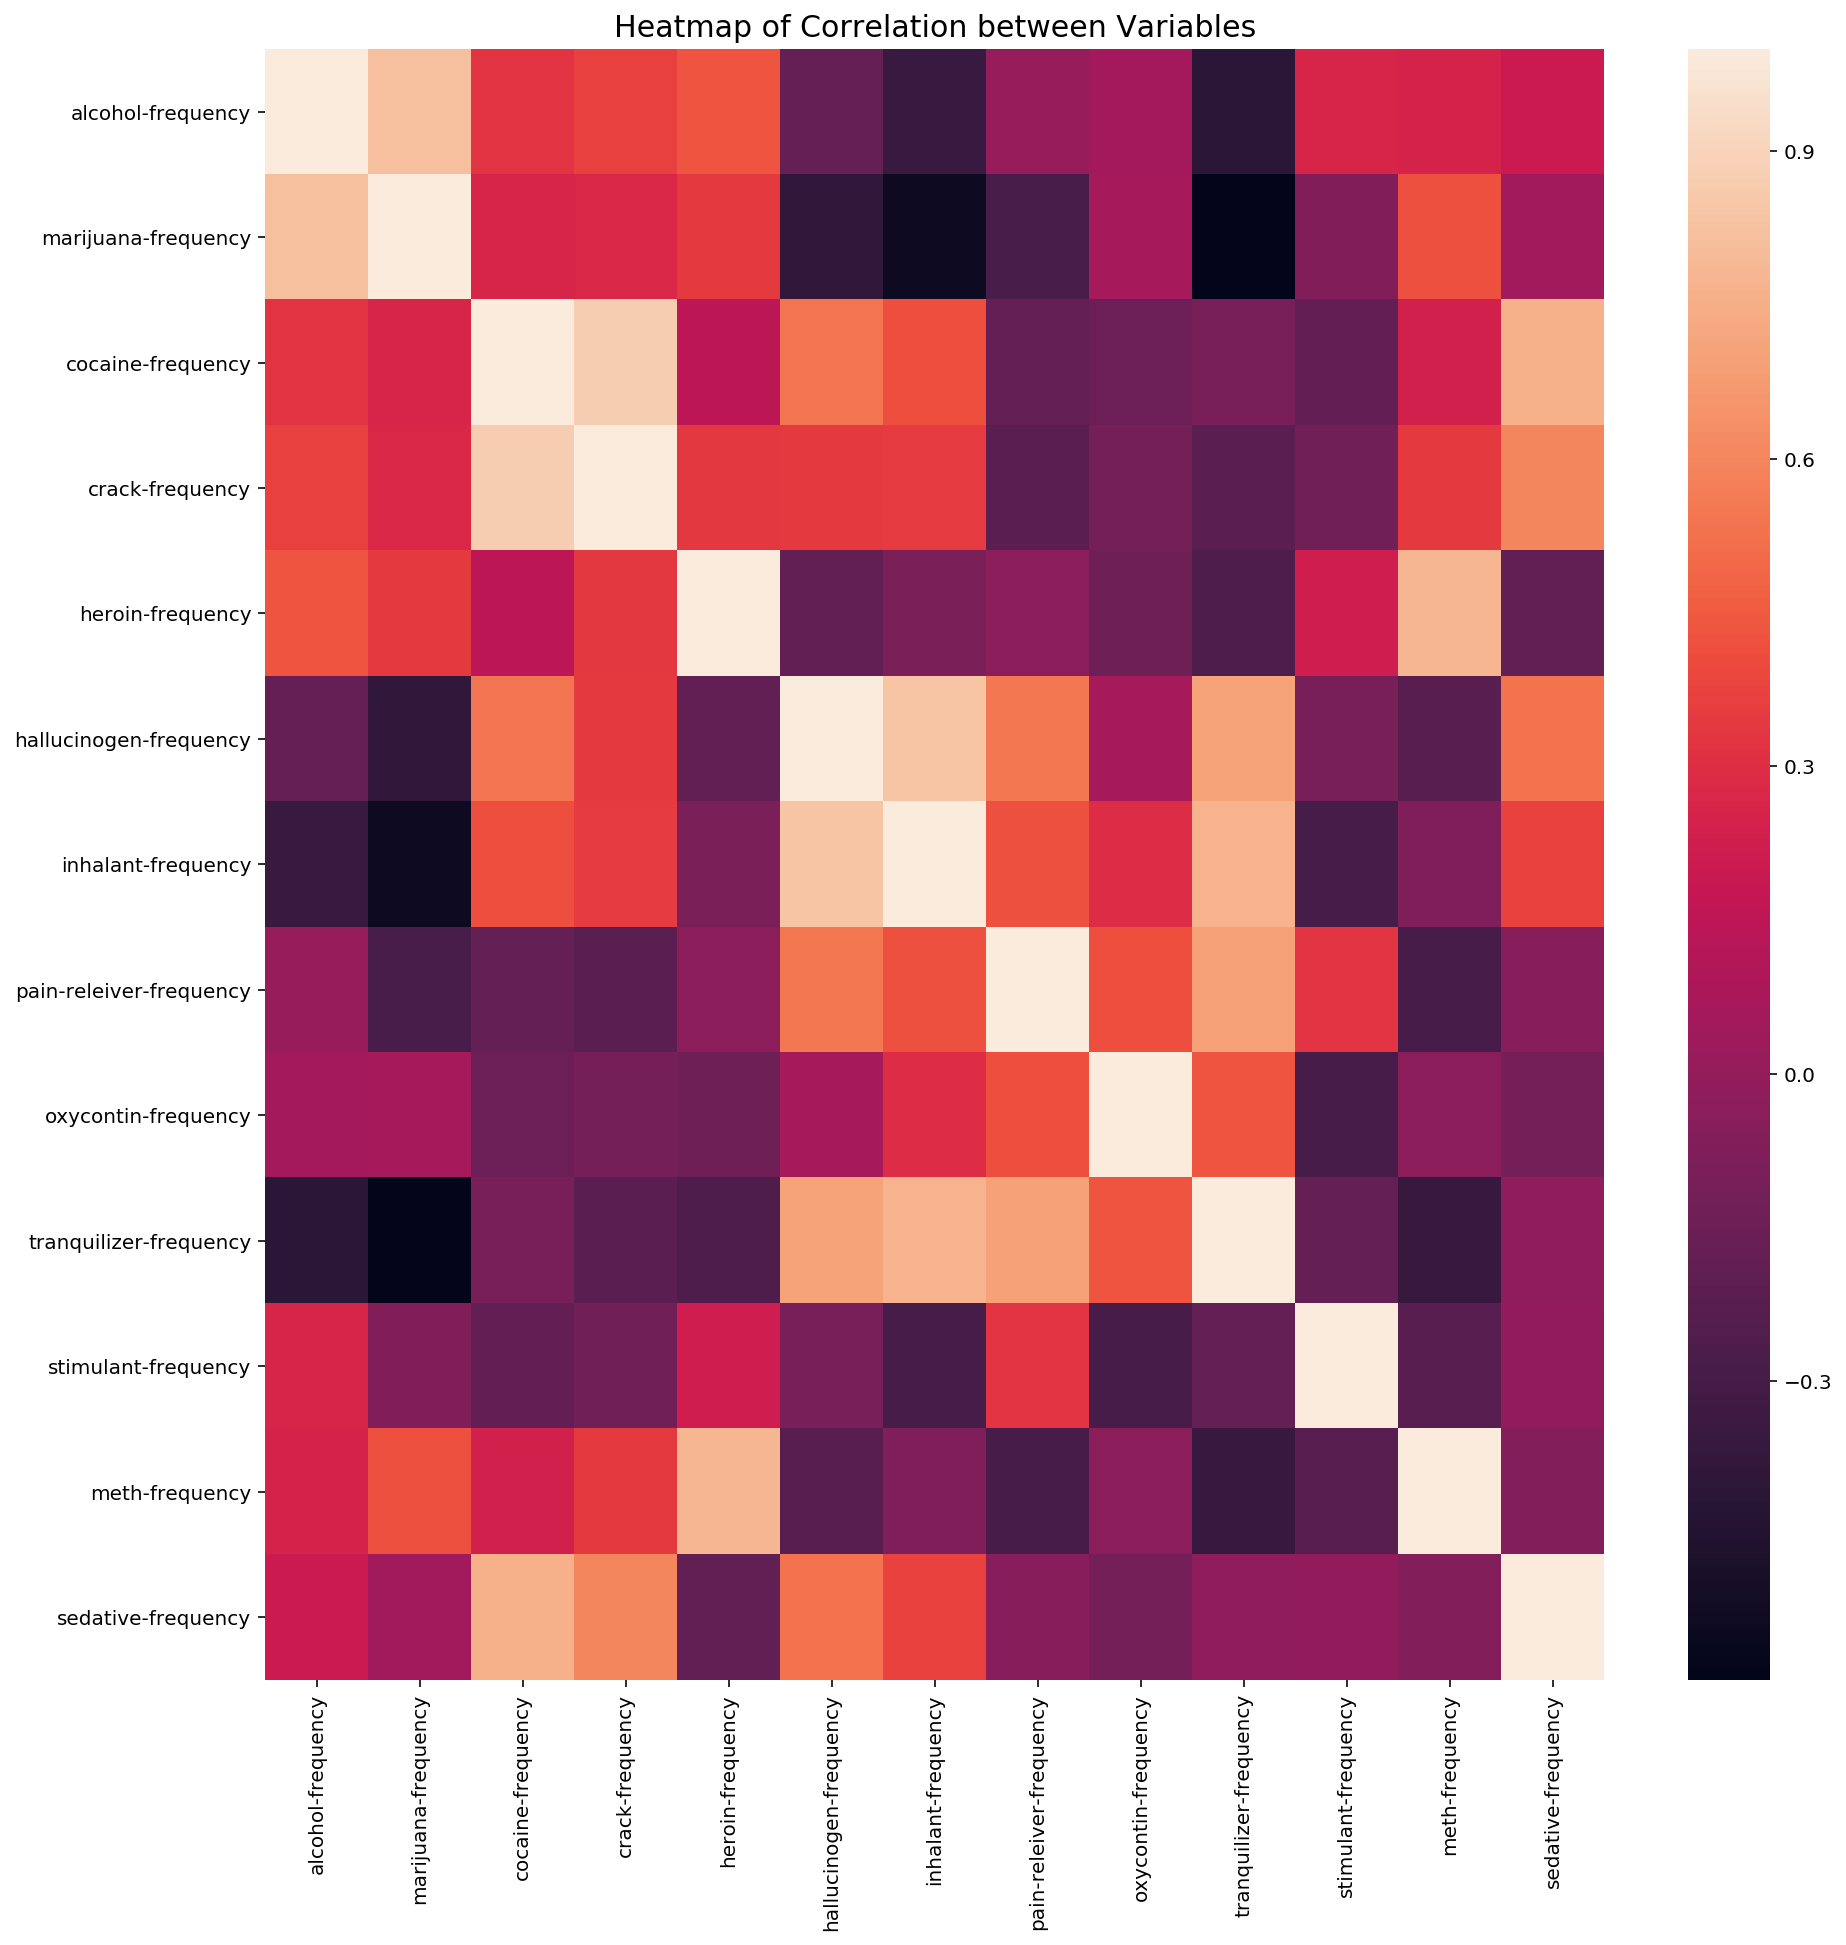

In [100]:
#Plot a Heatmap to better visualize correlation between variables.

fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(df_freq.corr(), ax=ax)

#Set the plot title
ax.set_title('Heatmap of Correlation between Variables', fontsize=15)

plt.show()

<font color='blue'>

#### Observations:

1. In general, there is not much correlation in the frequency of consumption between different drugs.
2. One notable exception is the positive correlation between Crack and Cocaine usage frequency.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

<font color='blue'>

#### Hypothesis:

There is a negative correlation between the percentage of Inhalant users to Alcohol and Crack users. 

In [101]:
#Create a new dataframe with only the variables we are intersted in.
df_use_sub = df[['age', 'alcohol-use', 'crack-use', 'inhalant-use']]

In [102]:
df_use_sub

,age,alcohol-use,crack-use,inhalant-use
0,12,3.9,0.0,1.6
1,13,8.5,0.0,2.5
2,14,18.1,0.0,2.6
3,15,29.2,0.1,2.5
4,16,40.1,0.0,3.0
5,17,49.3,0.1,2.0
6,18,58.7,0.4,1.8
7,19,64.6,0.5,1.4
8,20,69.7,0.6,1.5
9,21,83.2,0.5,1.4


In [103]:
#Check the correlation coefficient between the variables

df_use_sub.corr()

,alcohol-use,crack-use,inhalant-use
alcohol-use,1.000000,0.877378,-0.648248
crack-use,0.877378,1.000000,-0.543499
inhalant-use,-0.648248,-0.543499,1.000000


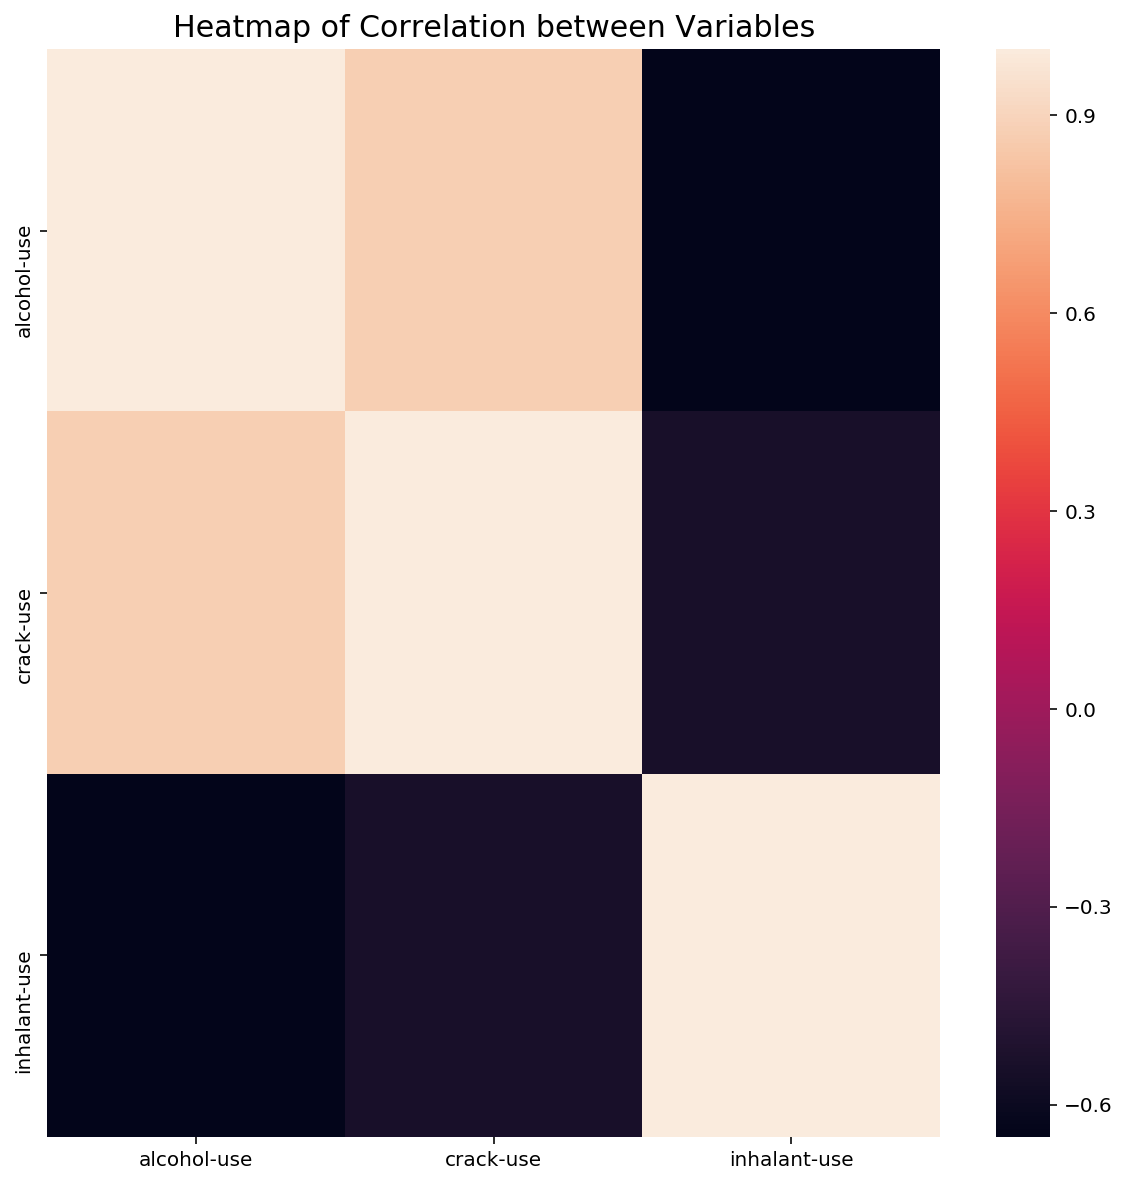

In [104]:
#Plot a Heatmap to better visualize correlation between variables.

fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(df_use_sub.corr(), ax=ax)

#Set the plot title
ax.set_title('Heatmap of Correlation between Variables', fontsize=15)

plt.show()

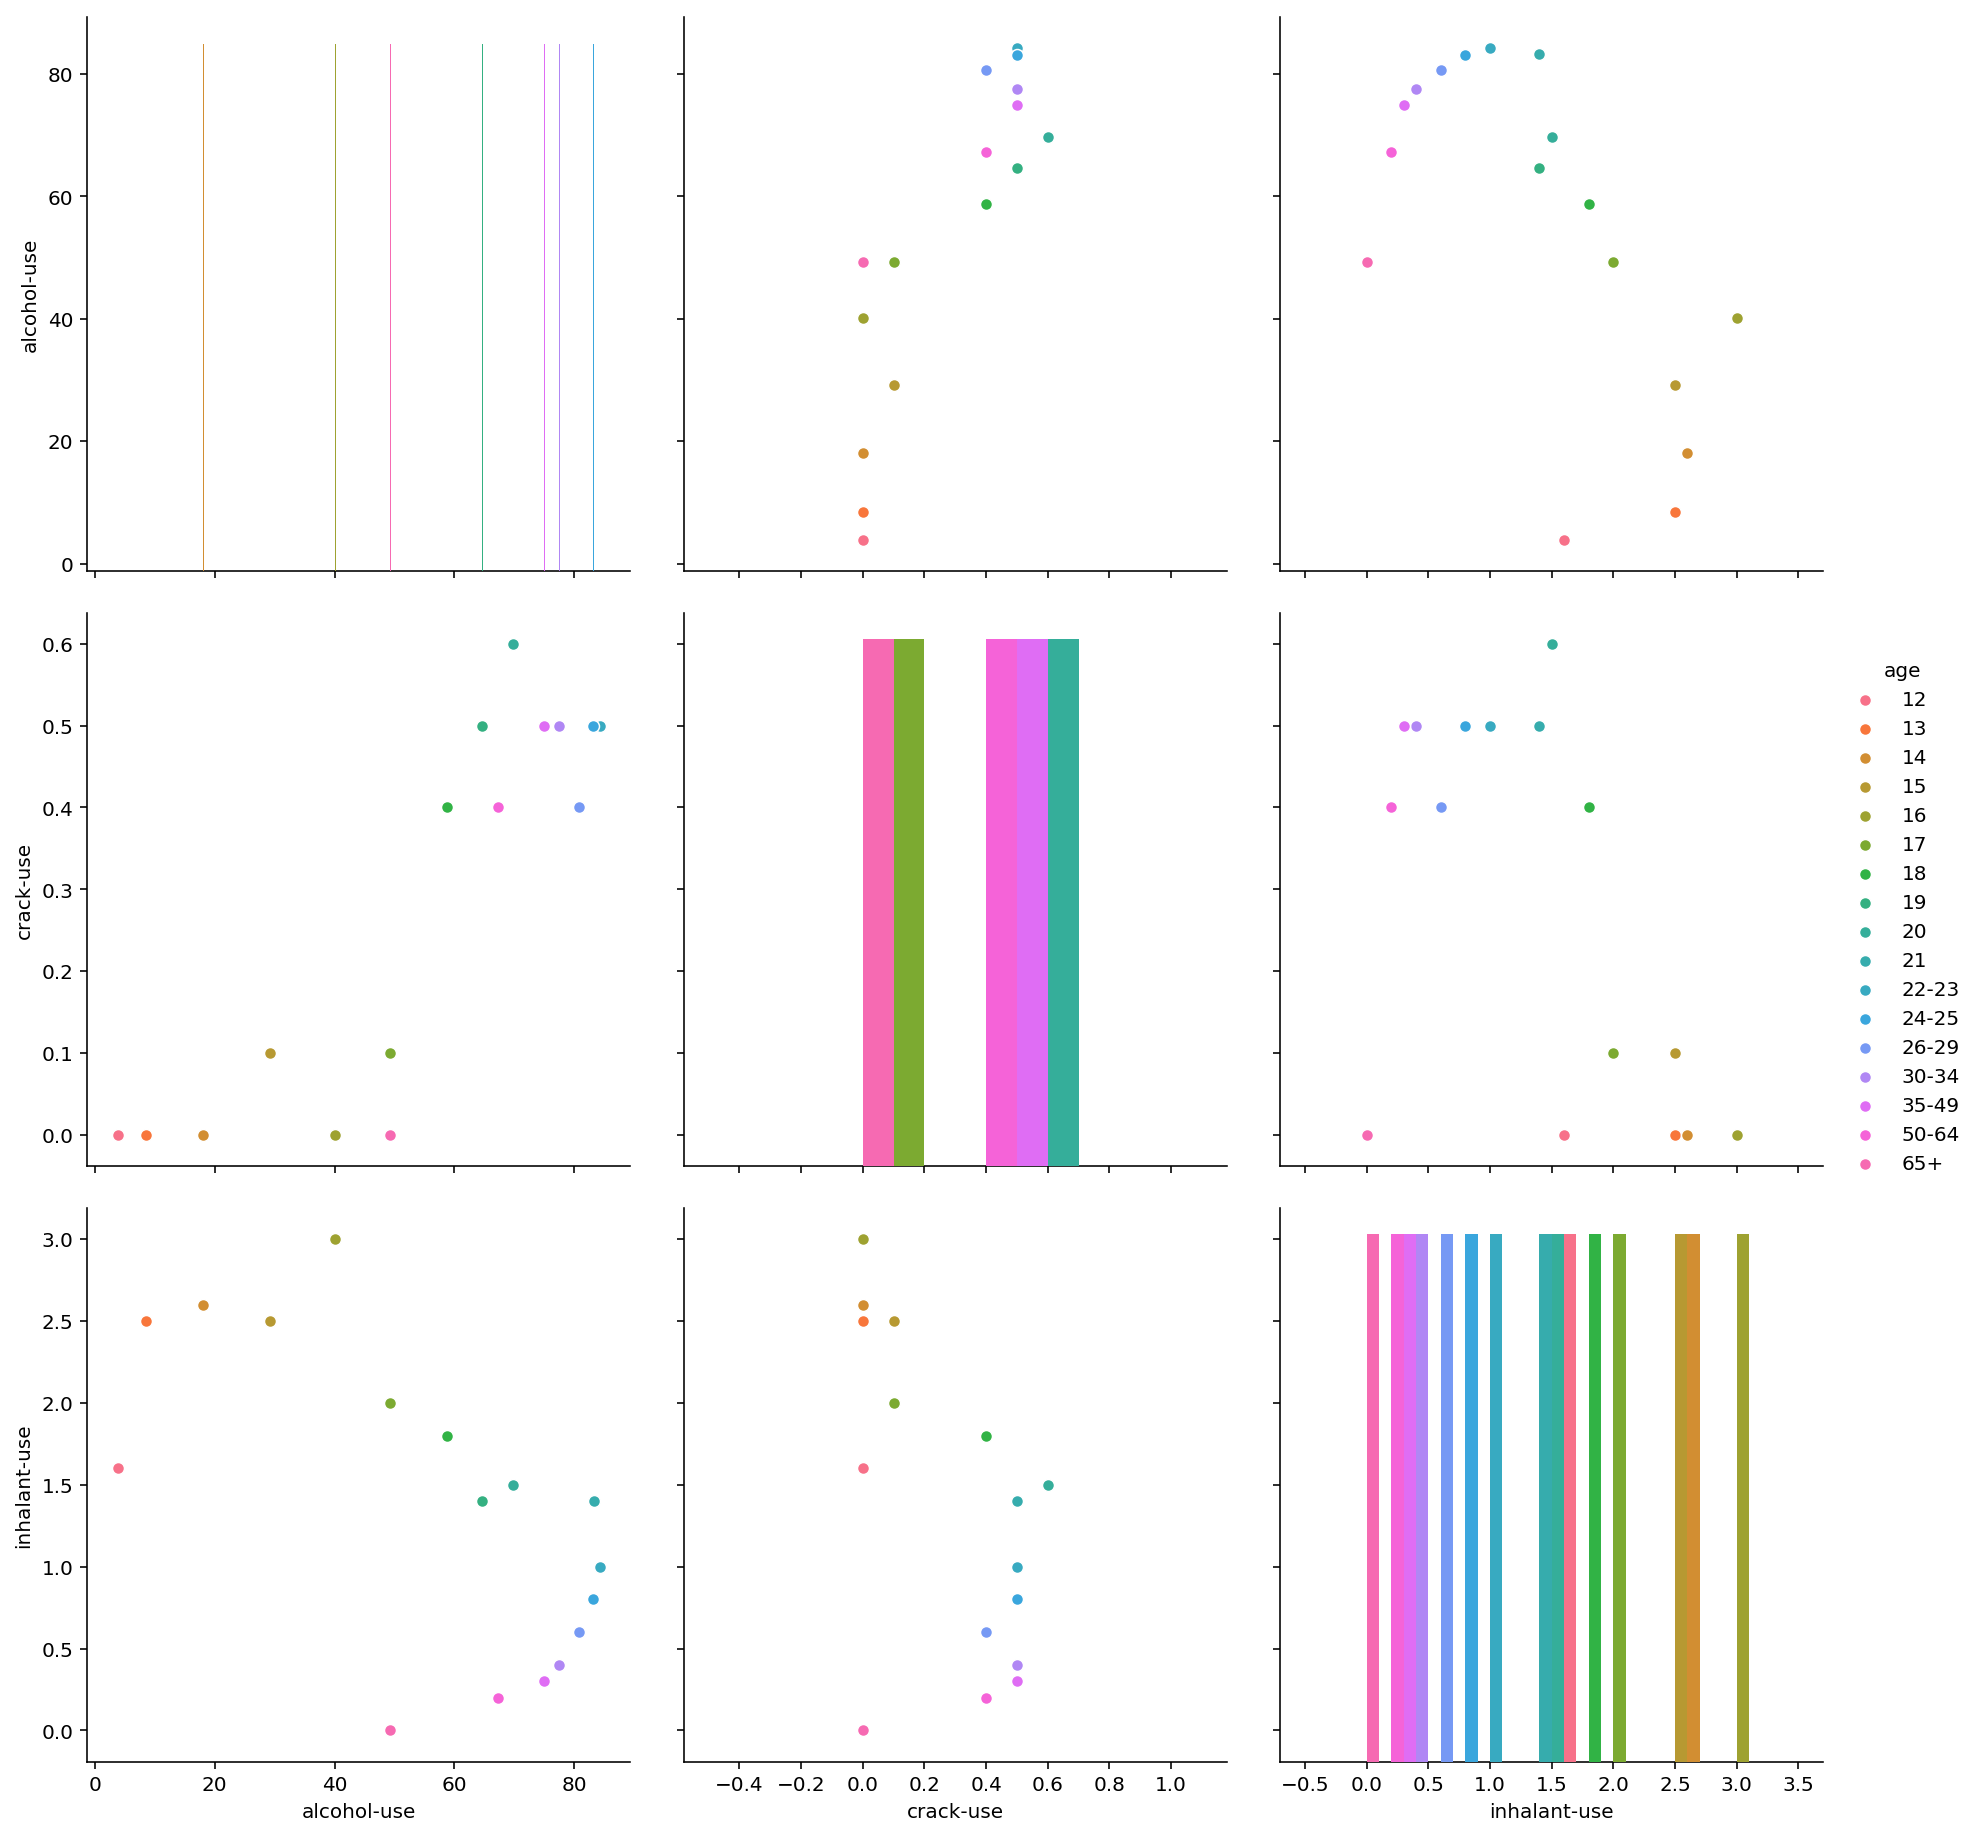

In [107]:
#Plot a pairplot to visualize the distribution trend between the variables.

sns.pairplot(df_use_sub, height=4.3, hue='age', diag_kind='hist')

plt.show()

<font color='blue'>

#### Report:

1. From the correlation coeeficient matrix and heatmap, we find that there is significant negative correlation 
   between the percentage of Inhalent and Alcohol users. There is also negative correlation between the percentage 
   of Inhalent and Crack users.
   
2. From the pairplot, we can visualize and confirm the negative correlation between percentage of Inhalant and 
   Alcohol and Crack users.
   
3. From the pairplot, we also observe that Inhalant usage is highest among the younger age group, and decreases 
   with age. 

4. From the pairplot, we also observe that alcohol usage increases with age, peaking at around age 21-25. This can 
   be attributed to the legal age for alcohol consumption.
   
5. Finally, from the pairplot, we see that usage of crack only starts from age 15 and above.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [106]:
#Rate variable from SAT dataset

rate = sat_df[['Rate']]

rate.describe()

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


<font color='blue'>

#### Answer:

Using the definition of outlier as any value that falls outside 1.5 x Interquartile Range (IQR) of the 25th and 75th quartile:

1.5 IQR = 1.5*(63.5 - 9) = 81.75

Lower limit = 9 - 81.75 = -72.75

Upper limit = 63.5 + 81.75 = 145.25

As the min and max values in the Rate variable falls within the Lower and Upper limit of the outlier range, we can conclude that there are no outliers in the Rate variable.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.